In [1]:
# import libraries
import numpy as np
from pylab import *
from scipy.ndimage import gaussian_filter1d

In [2]:
# Code to extract parameter information from the simulation output log file, storing the data in lists.
# The full dataset is also printed

# defining initial data lists to store data
Step = []
TotEng = []
PotEng = []
KinEng = []
Temp = []
Press = []
Lx = []
Ly = []
Lz = []
Volume = []
Density = []

# loop through log file to extract data
with open('lammps_files/log.logfile','r') as logfile:
    line_count=0 # line counter
    minimisation_exclusion = 0 # counter based condition to locate the correct dataset within the log file
    condition = False # condition to help define the end of the dataset

    # loop through each line
    for line in logfile:
        line_count=line_count+1 # updating line counter

        if 'Step' and 'TotEng' and 'PotEng' in line: # defining condition where dataset could be
            minimisation_exclusion = minimisation_exclusion + 1 # first occurance is during simulation minimisation, not the actual dataset
            
            if minimisation_exclusion == 2: # second occurance is the correct dataset location
                parameters = line.split() # splitting the line
                # obtaining the index of each parameter in the dataset (aka column number)
                Step_index = parameters.index('Step')
                TotEng_index = parameters.index('TotEng')
                PotEng_index = parameters.index('PotEng')
                KinEng_index = parameters.index('KinEng')
                Temp_index = parameters.index('Temp')
                Press_index = parameters.index('Press')
                Lx_index = parameters.index('Lx')
                Ly_index = parameters.index('Ly')
                Lz_index = parameters.index('Lz')
                Volume_index = parameters.index('Volume')
                Density_index = parameters.index('Density')

        # defining condition to locate the end of the dataset
        if minimisation_exclusion == 2 and condition == False:
                if line.split()[0] == 'Loop':
                    condition = True # updating condition to True once the dataset has ended
                
        # after dataset is located, screen between beginning and end of dataset
        if minimisation_exclusion == 2 and condition == False:
                # store data in relevant list
                split_line = line.split()
                Step.extend([split_line[(Step_index)]])
                TotEng.extend([split_line[TotEng_index]])
                PotEng.extend([split_line[PotEng_index]])
                KinEng.extend([split_line[KinEng_index]])
                Temp.extend([split_line[Temp_index]])
                Press.extend([split_line[Press_index]])
                Lx.extend([split_line[Lx_index]])
                Ly.extend([split_line[Ly_index]])
                Lz.extend([split_line[Lz_index]])
                Volume.extend([split_line[Volume_index]])
                Density.extend([split_line[Density_index]])

                print(line) # printing out the entire dataset

# converting parameter data from a list of strings to a list of floats for easier plotting
Step = [float(i) for i in Step[1:]]
TotEng = [float(i) for i in TotEng[1:]]
PotEng = [float(i) for i in PotEng[1:]]
KinEng = [float(i) for i in KinEng[1:]]
Temp = [float(i) for i in Temp[1:]]
Press = [float(i) for i in Press[1:]]
Lx = [float(i) for i in Lx[1:]]
Ly = [float(i) for i in Ly[1:]]
Lz = [float(i) for i in Lz[1:]]
Volume = [float(i) for i in Volume[1:]]
Density = [float(i) for i in Density[1:]]

# for plotting, convert step list to list containing x axis times in ns
time_data = list(np.array(Step)/1000000)

Step TotEng PotEng KinEng Temp Press Lx Ly Lz Volume Density 

     100     260.9856   -997.70914    1258.6947          298    3906.5038           30           30           30        27000     1.374606 

   50000    849.10729   -399.54123    1248.6485    295.62152    205.16129    31.025649    31.025649    31.025649    29865.009    1.2427373 

  100000    811.56682   -460.83759    1272.4044    301.24581   -710.98646    30.941229    30.941229    30.941229    29621.885    1.2529372 

  150000    813.01328   -435.75661    1248.7699    295.65026    185.11613     30.70735     30.70735     30.70735    28955.229    1.2817844 

  200000    792.49478   -449.62889    1242.1237    294.07675   -558.11635    30.713507    30.713507    30.713507     28972.65    1.2810137 

  250000    792.27758   -465.41175    1257.6893    297.76197   -1236.9555    30.684297    30.684297    30.684297    28890.067    1.2846755 

  300000    794.37488   -483.43436    1277.8092    302.52542   -225.54183    30.611919    3

The below code boxes all plot graphs of the given parameter Vs time. The first two frames of the simulation (0.1 ns) is not plotted as these points are at the beginning of the simulation, where initial equilibration means that values are typically extreme.

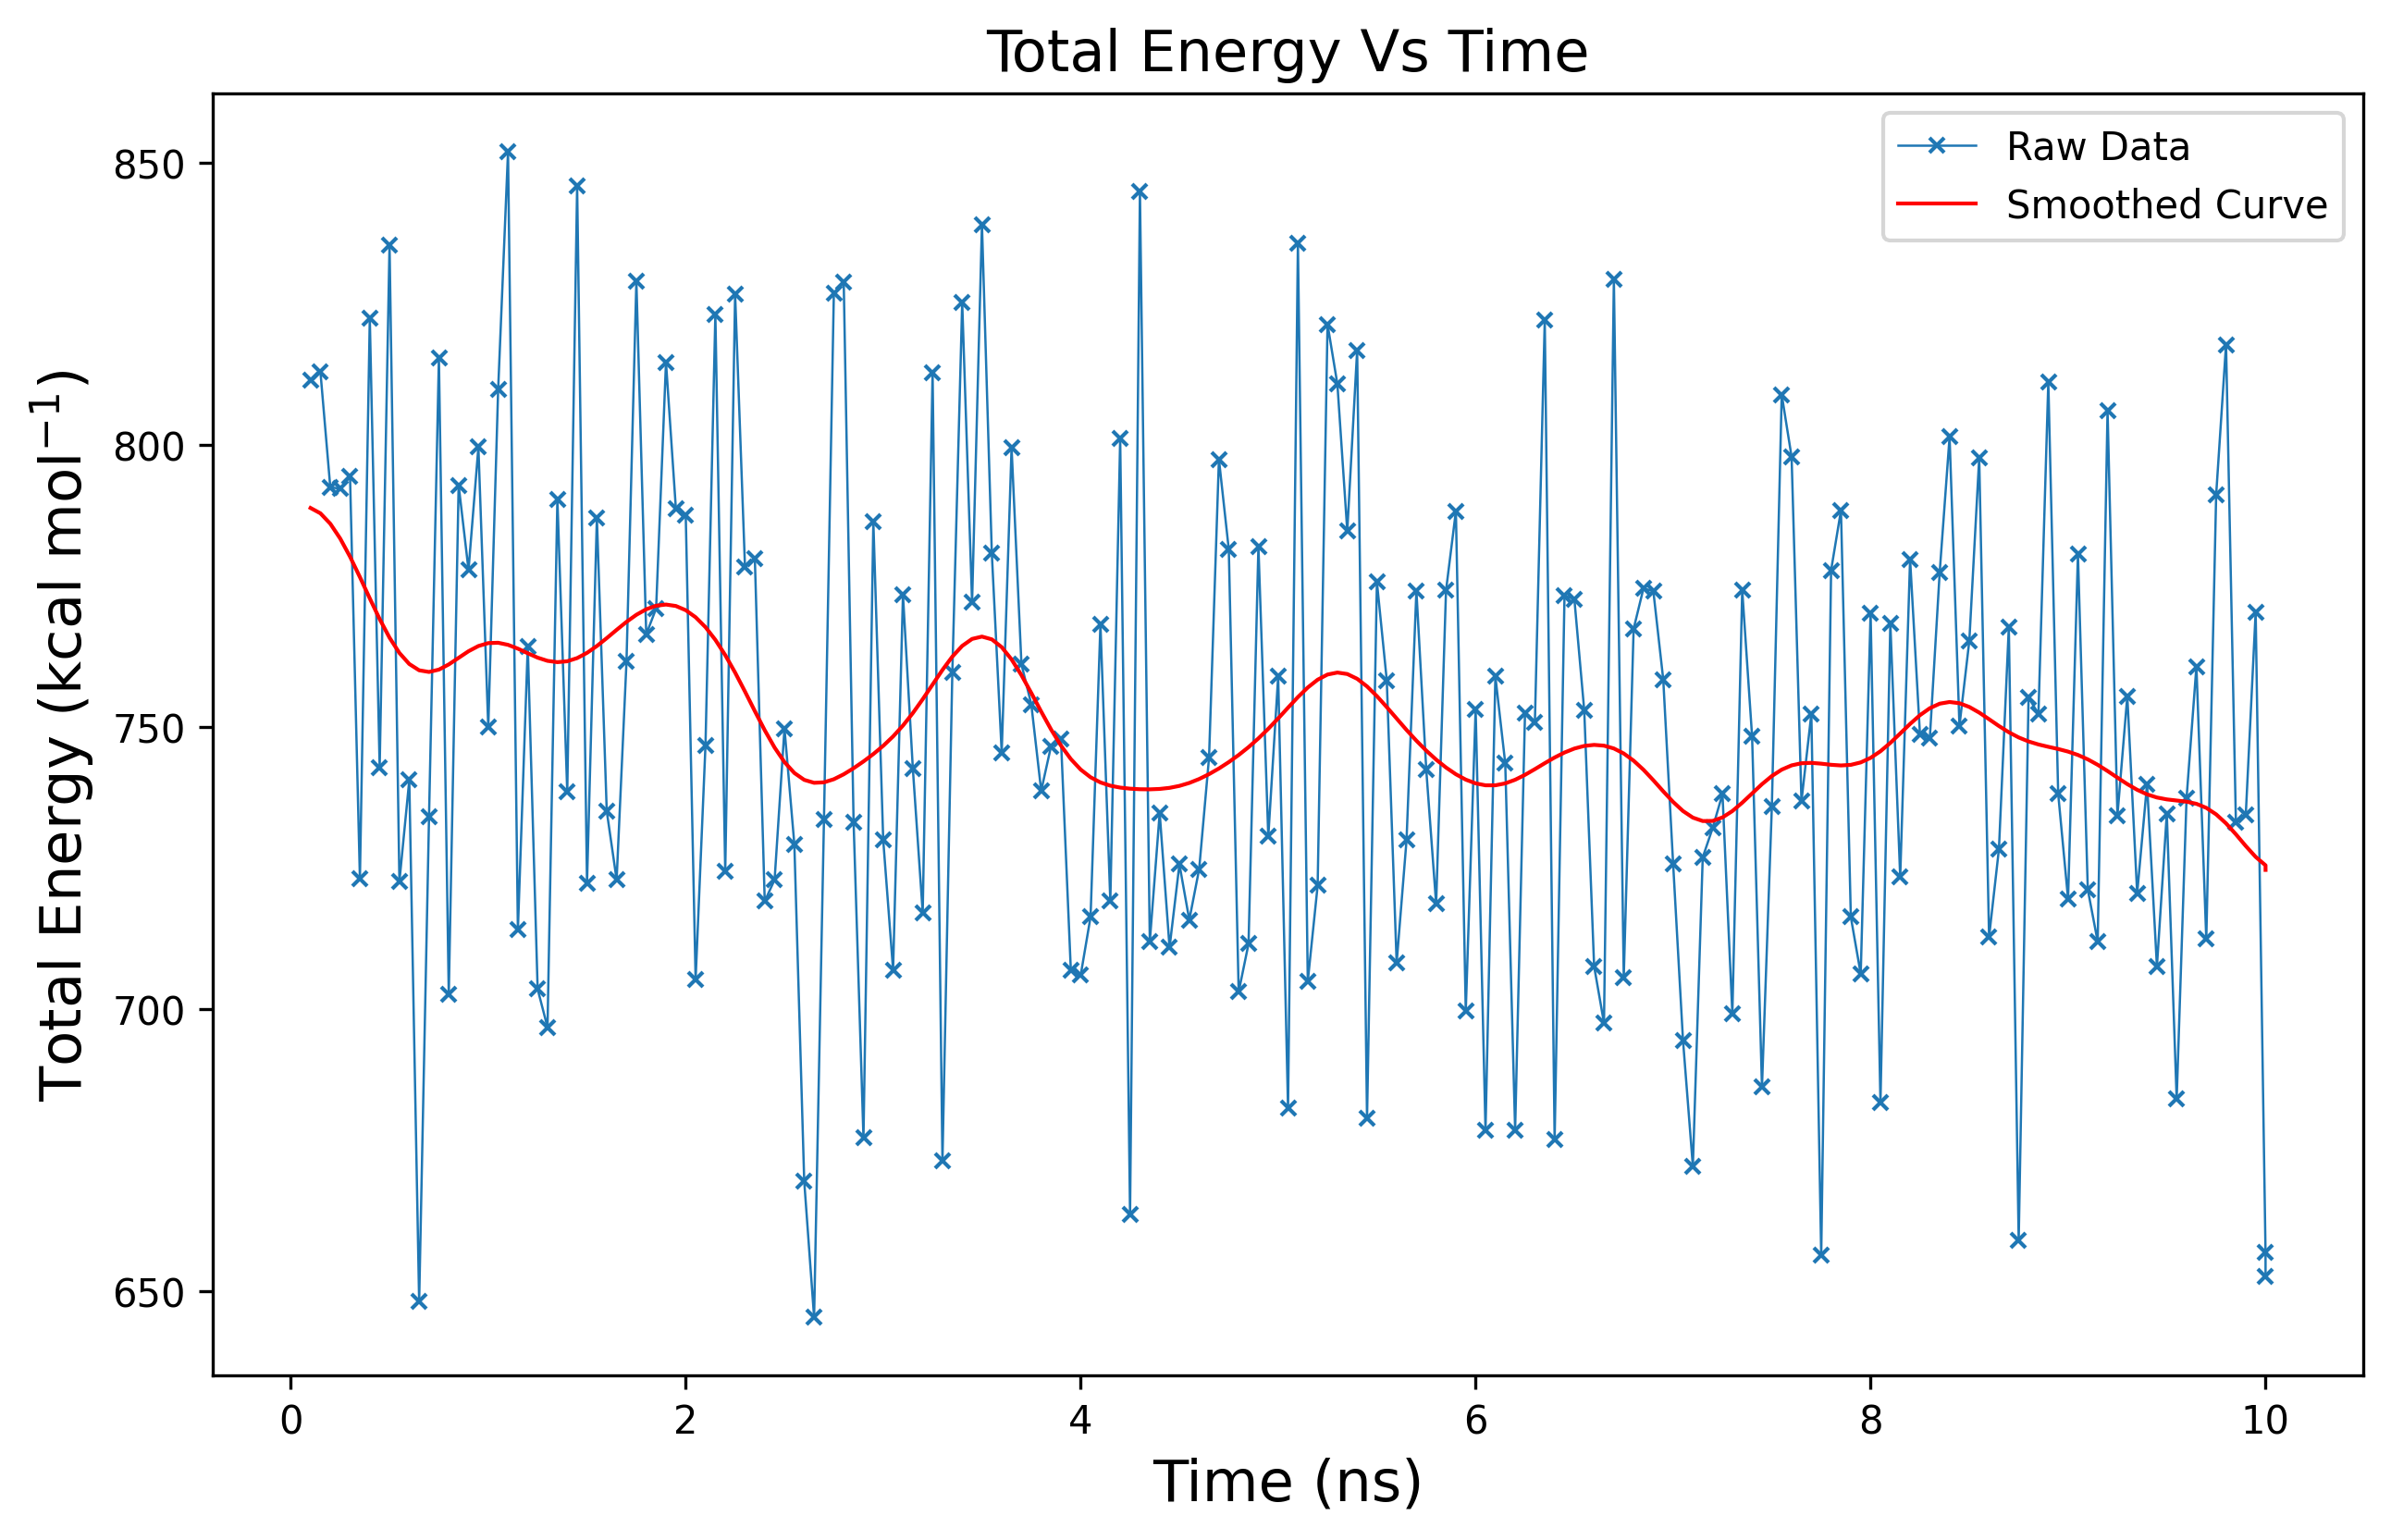

In [3]:
figure(figsize=[10,6],dpi=300)
TotEng_smooth = gaussian_filter1d(TotEng[2:], sigma=5)  # increase sigma for more smoothing
plot(time_data[2:], TotEng[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], TotEng_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Total Energy Vs Time', fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel(r'Total Energy (kcal mol$^{-1}$)',fontsize=15)
legend()
show()

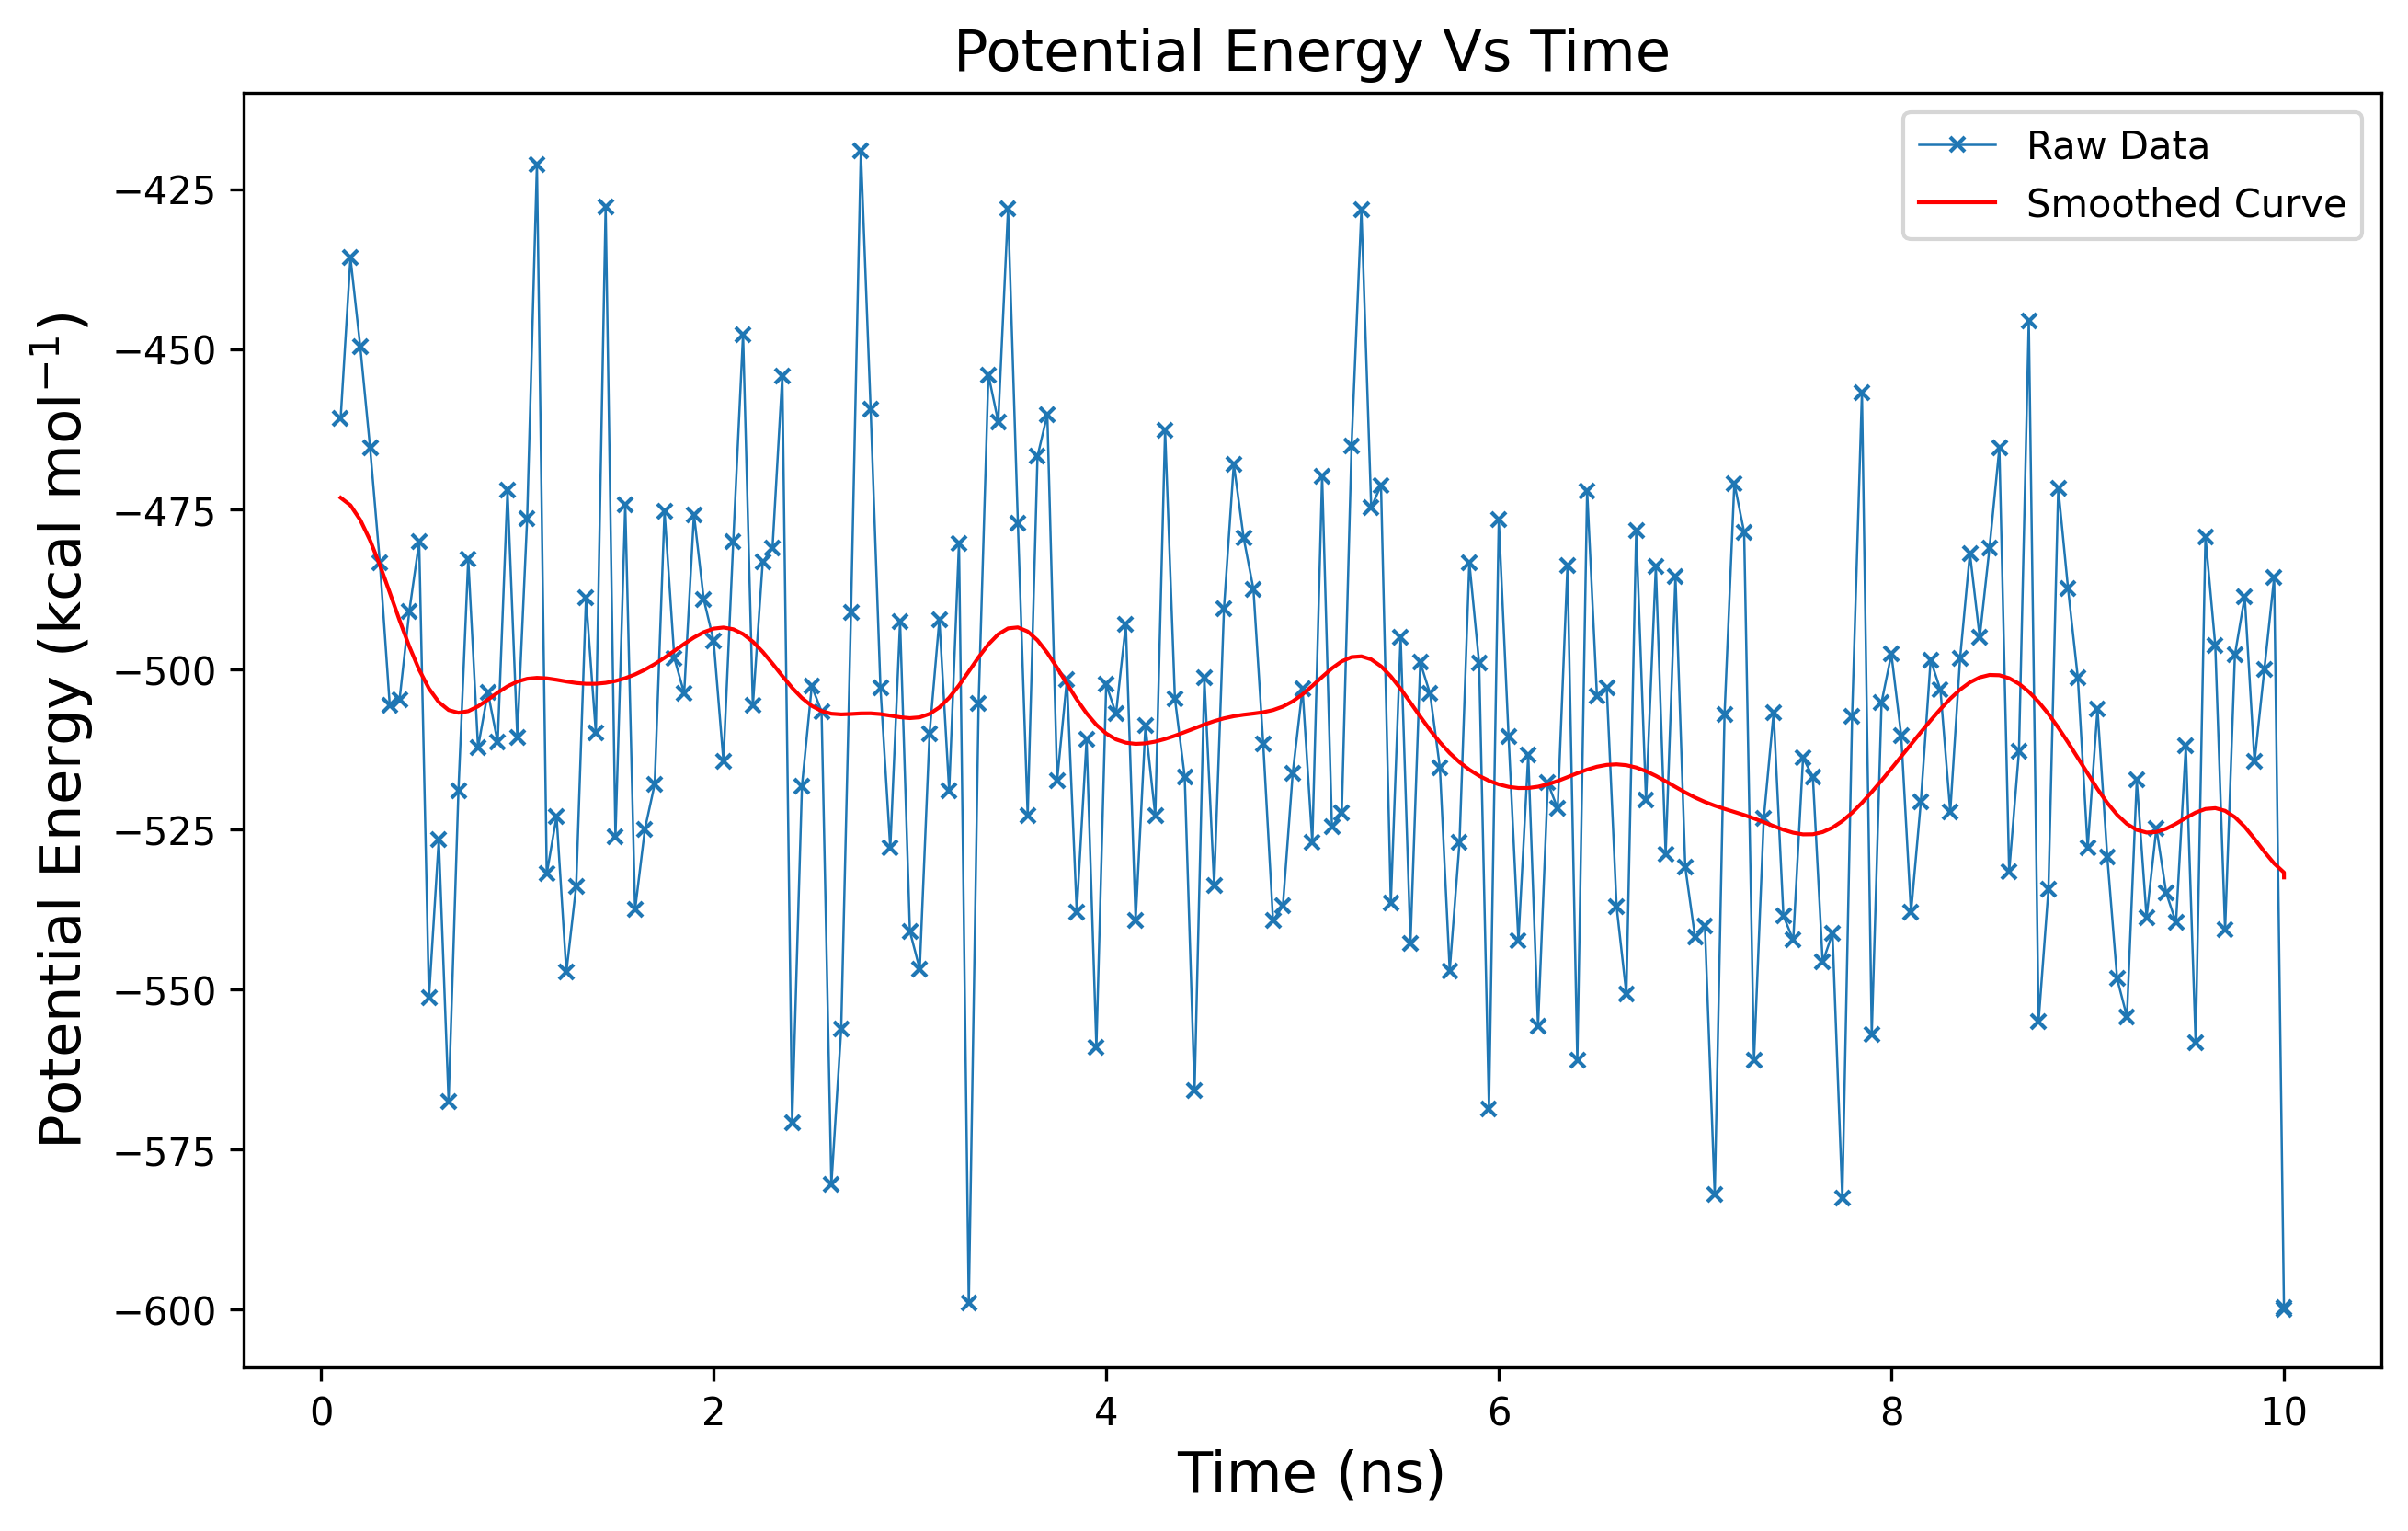

In [4]:
figure(figsize=[10,6],dpi=300)
PotEng_smooth = gaussian_filter1d(PotEng[2:], sigma=5)  # increase sigma for more smoothing
plot(time_data[2:], PotEng[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], PotEng_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Potential Energy Vs Time',fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel(r'Potential Energy (kcal mol$^{-1}$)',fontsize=15)
legend()
show()

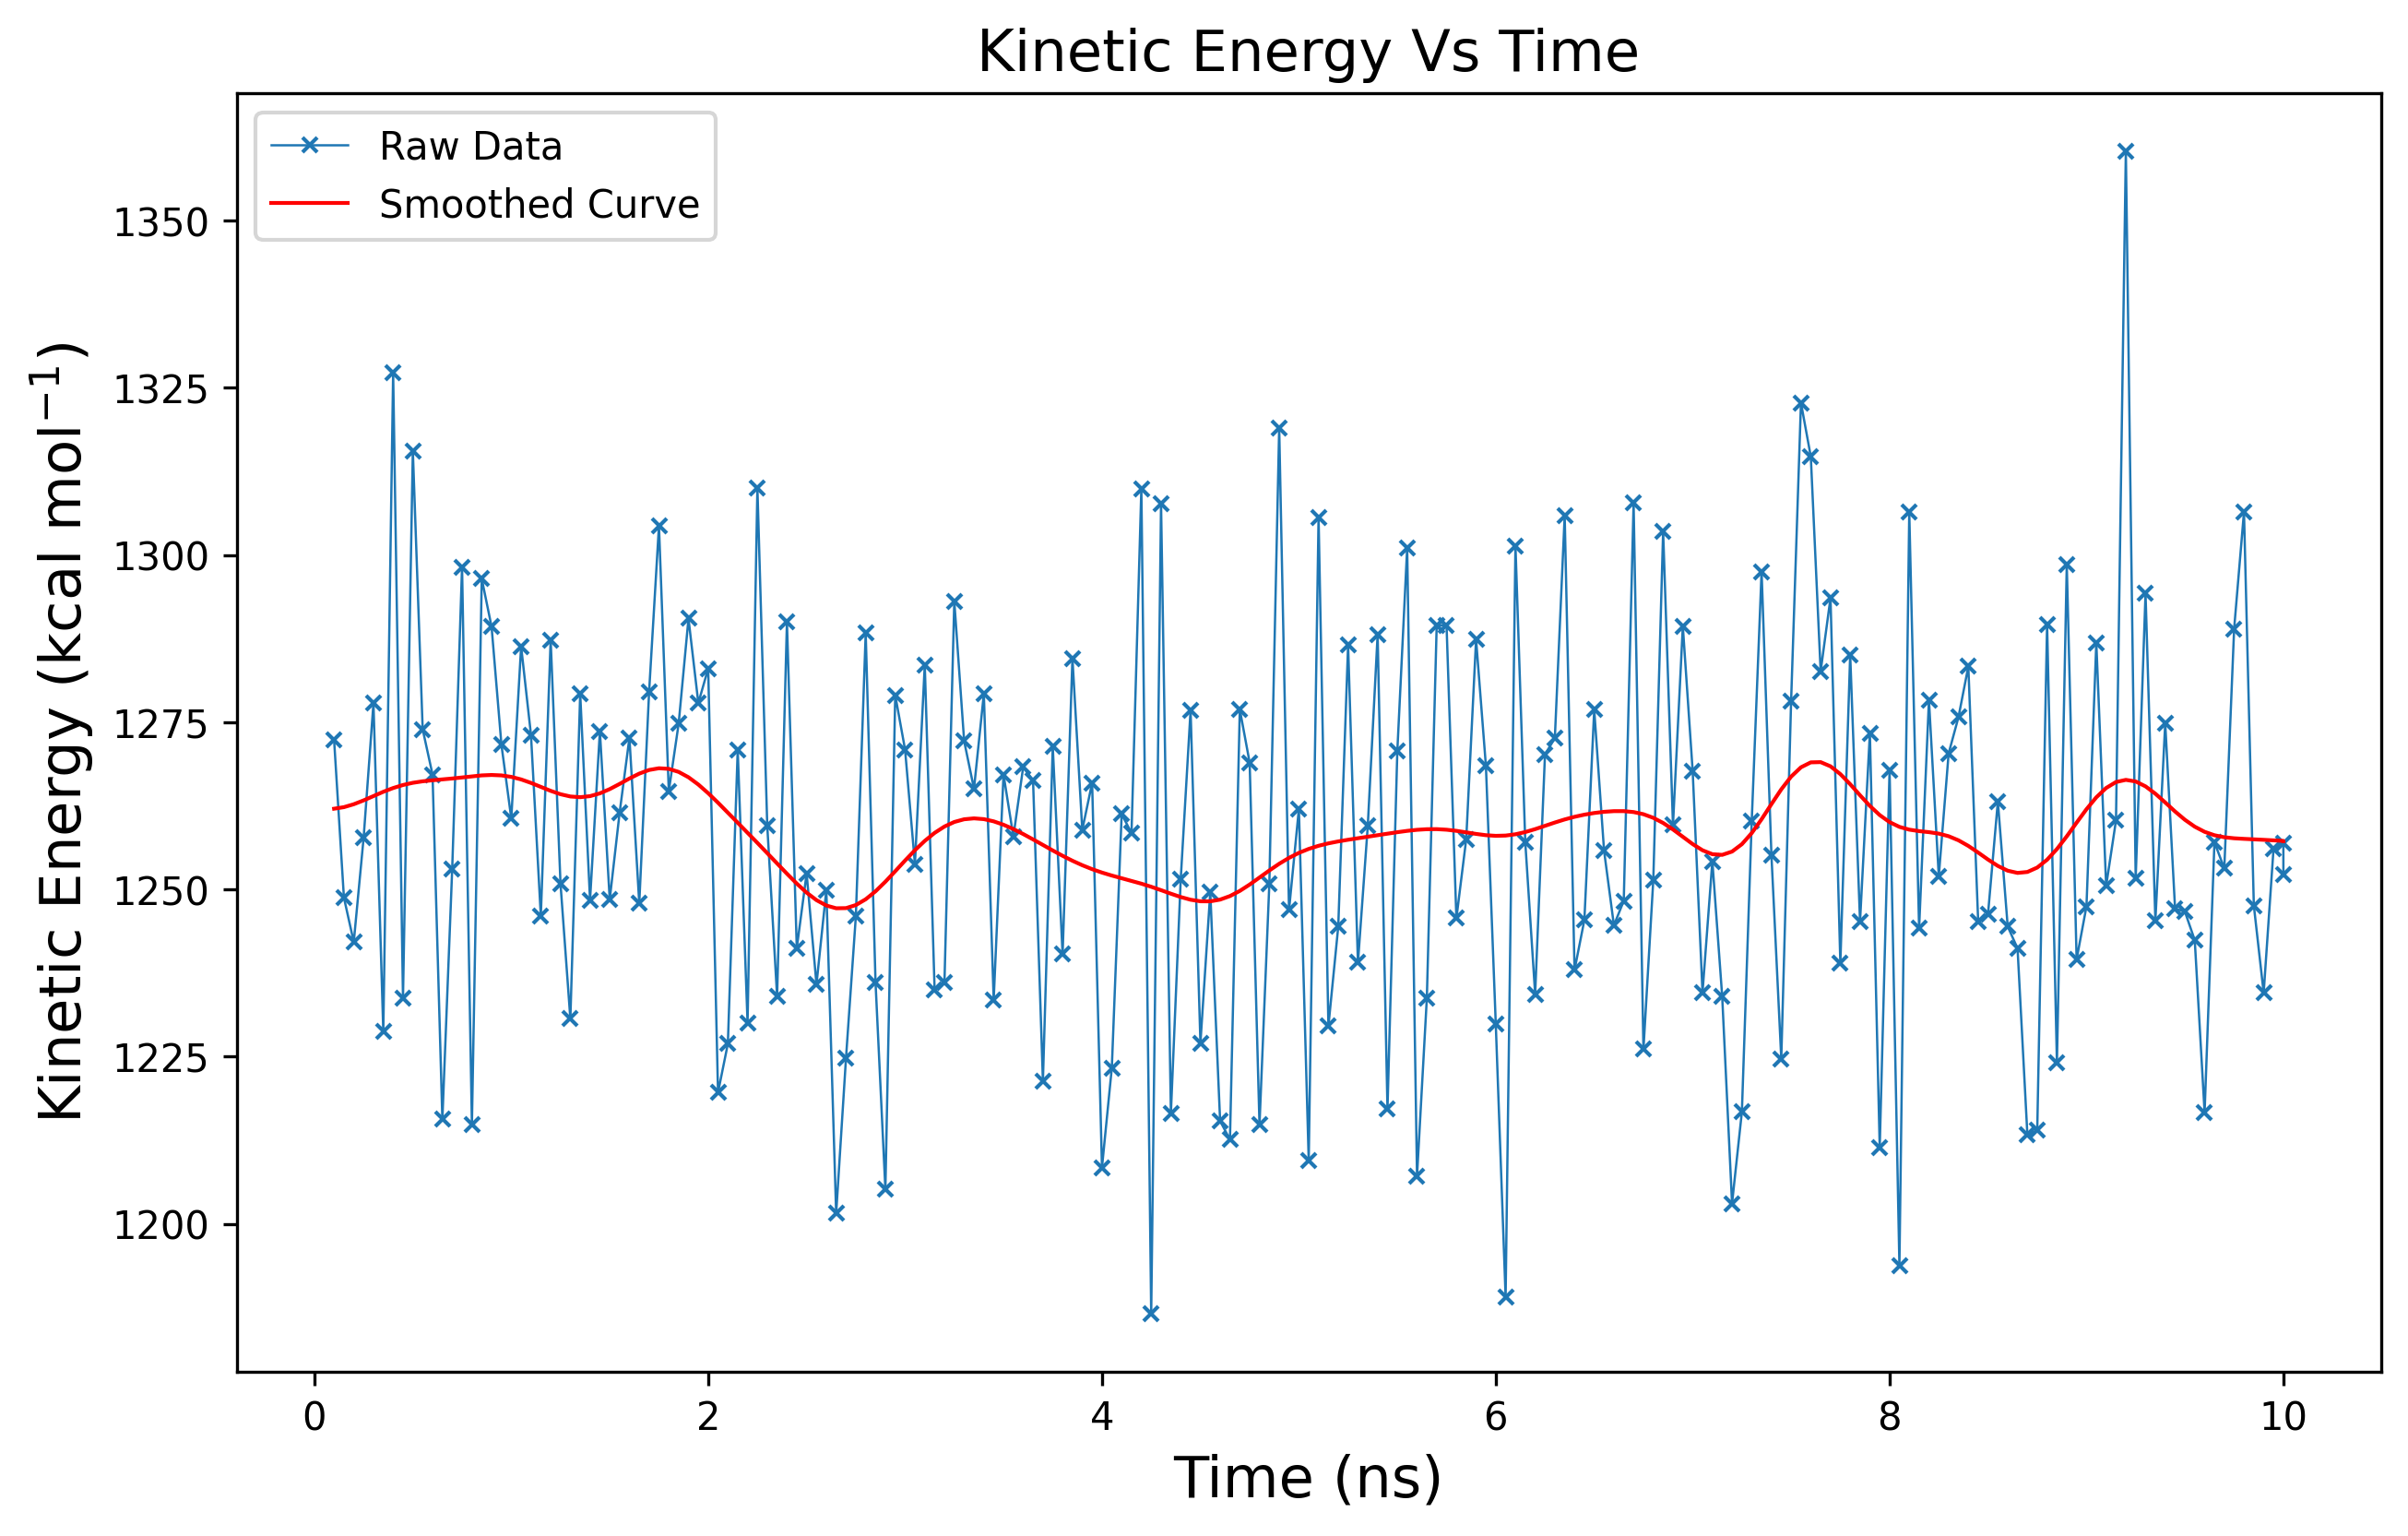

In [5]:
figure(figsize=[10,6],dpi=300)
KinEng_smooth = gaussian_filter1d(KinEng[2:], sigma=5)  # increase sigma for more smoothing
plot(time_data[2:], KinEng[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], KinEng_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Kinetic Energy Vs Time',fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel(r'Kinetic Energy (kcal mol$^{-1}$)',fontsize=15)
legend()
show()

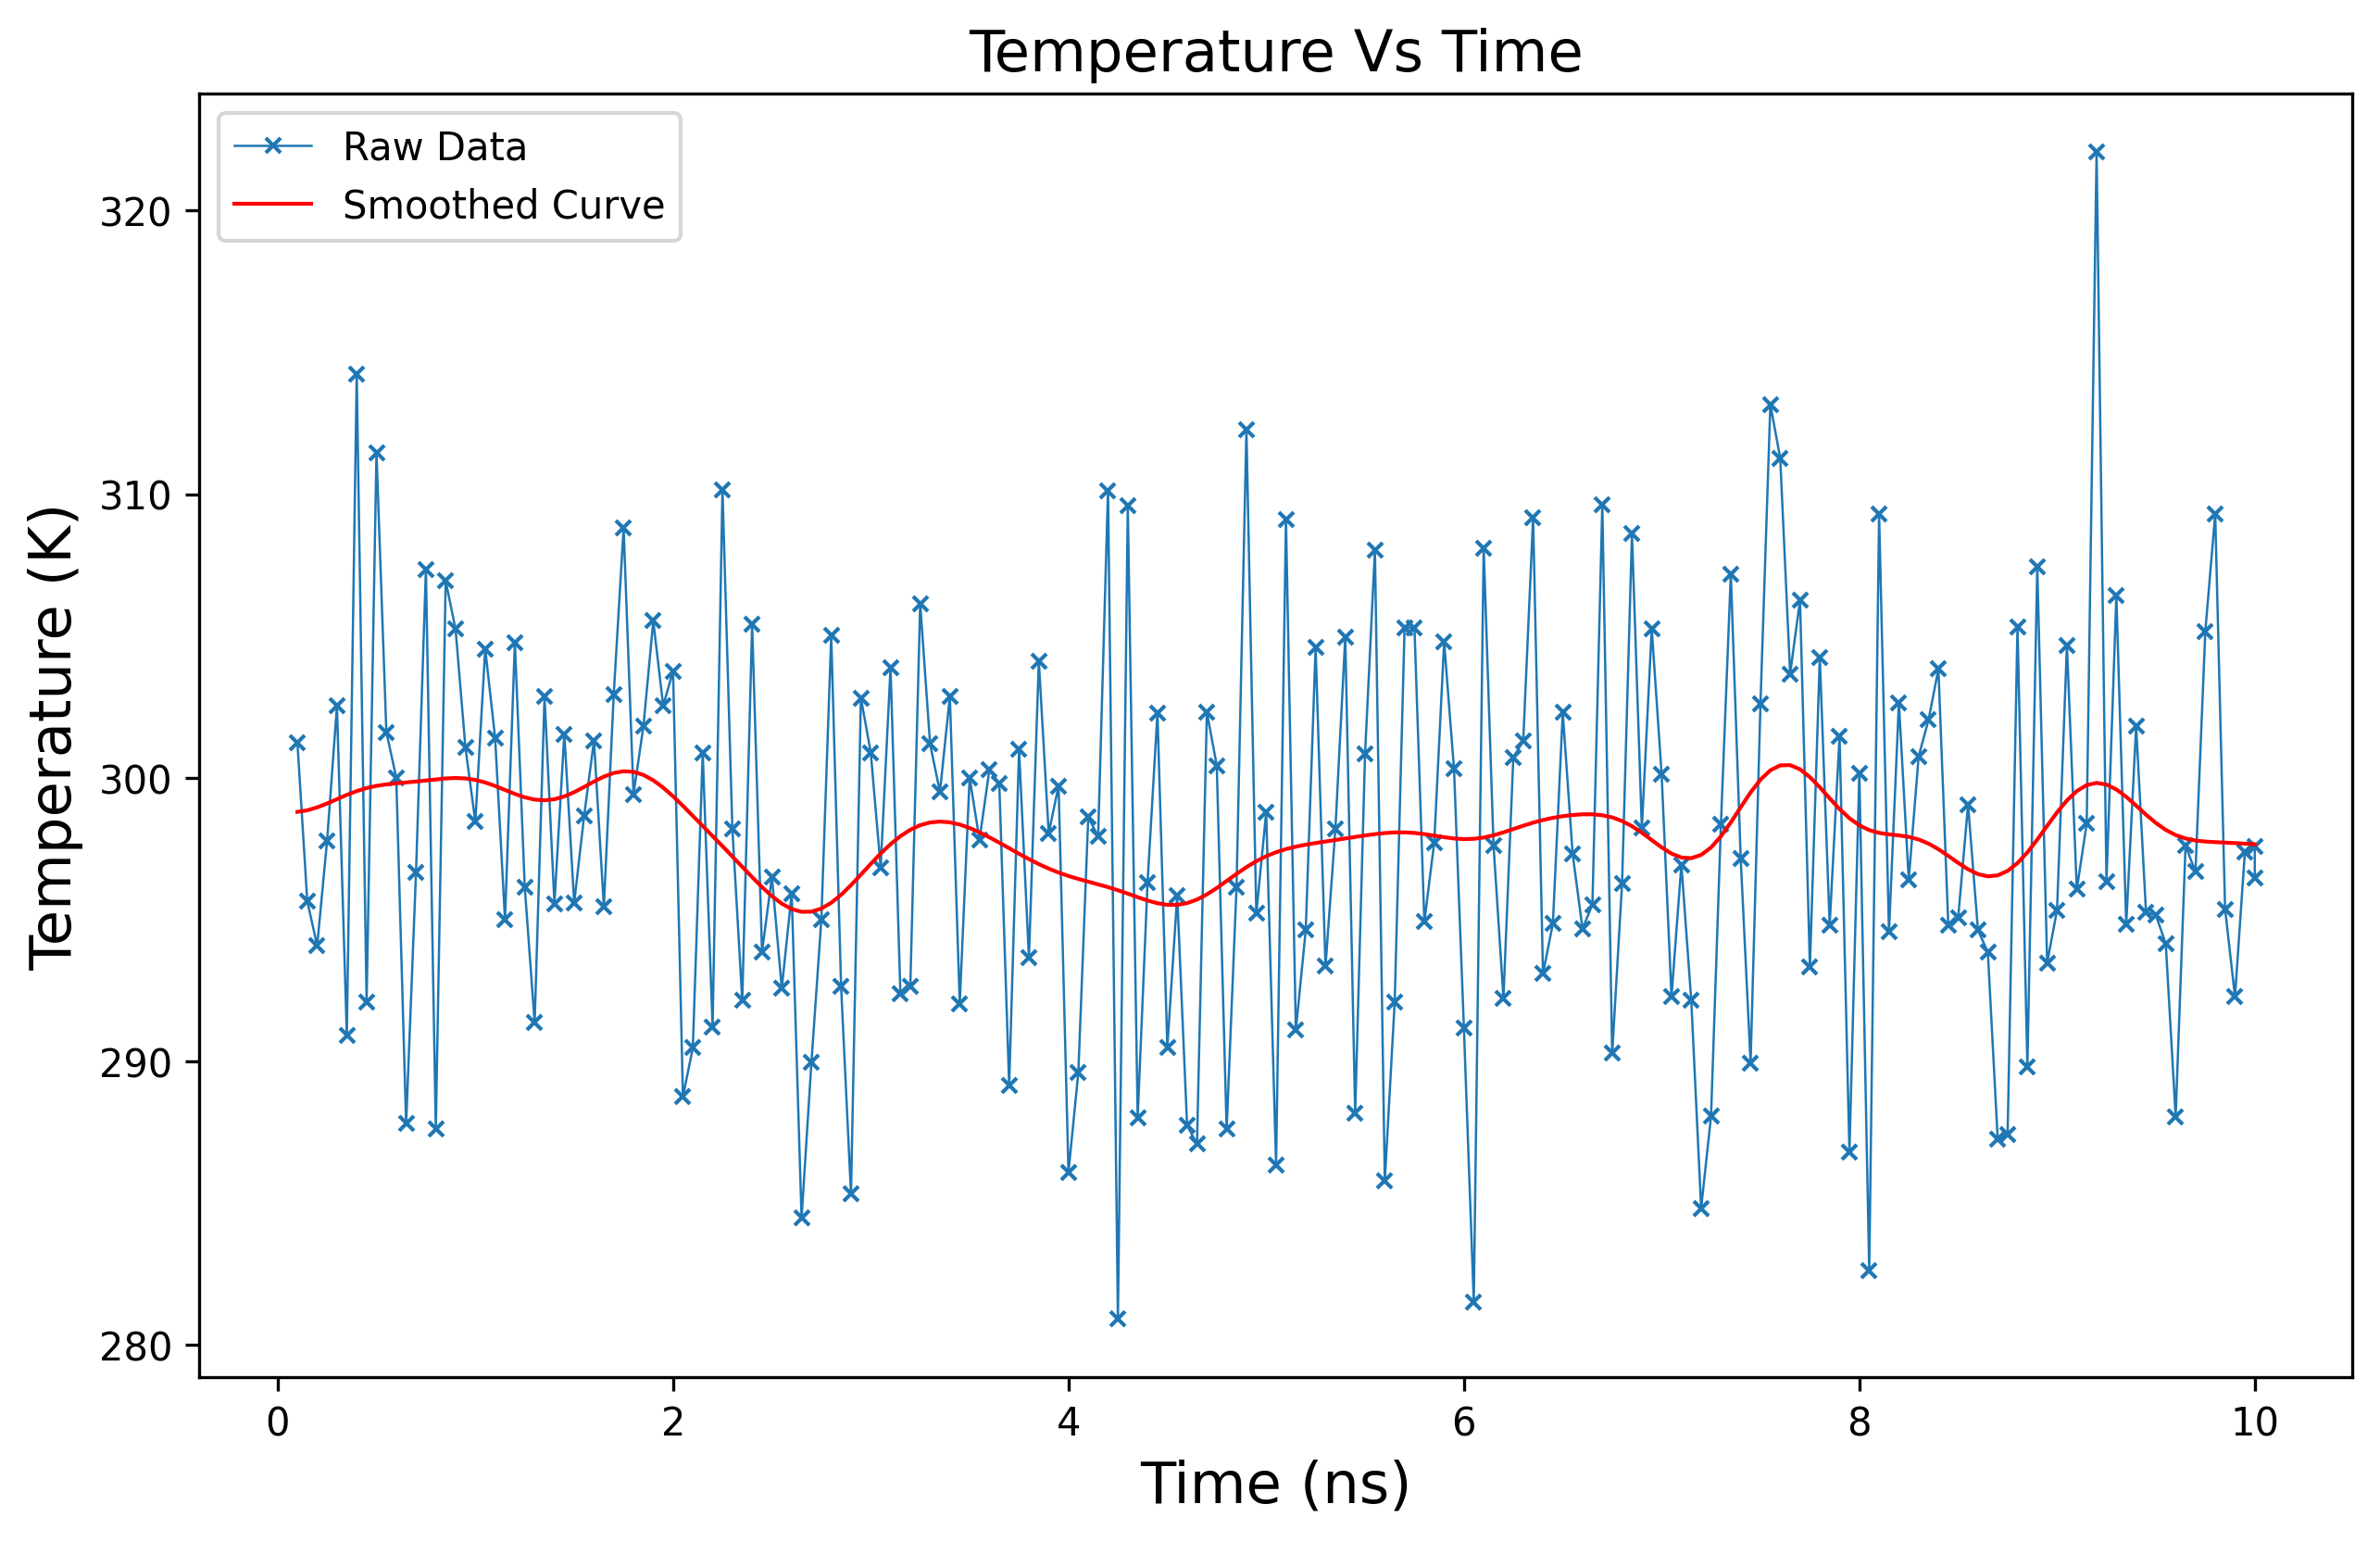

In [6]:
figure(figsize=[10,6],dpi=300)
Temp_smooth = gaussian_filter1d(Temp[2:], sigma=5)  # Increase sigma for more smoothing
plot(time_data[2:], Temp[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], Temp_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Temperature Vs Time',fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel("Temperature (K)", fontsize=15)
legend()
show()

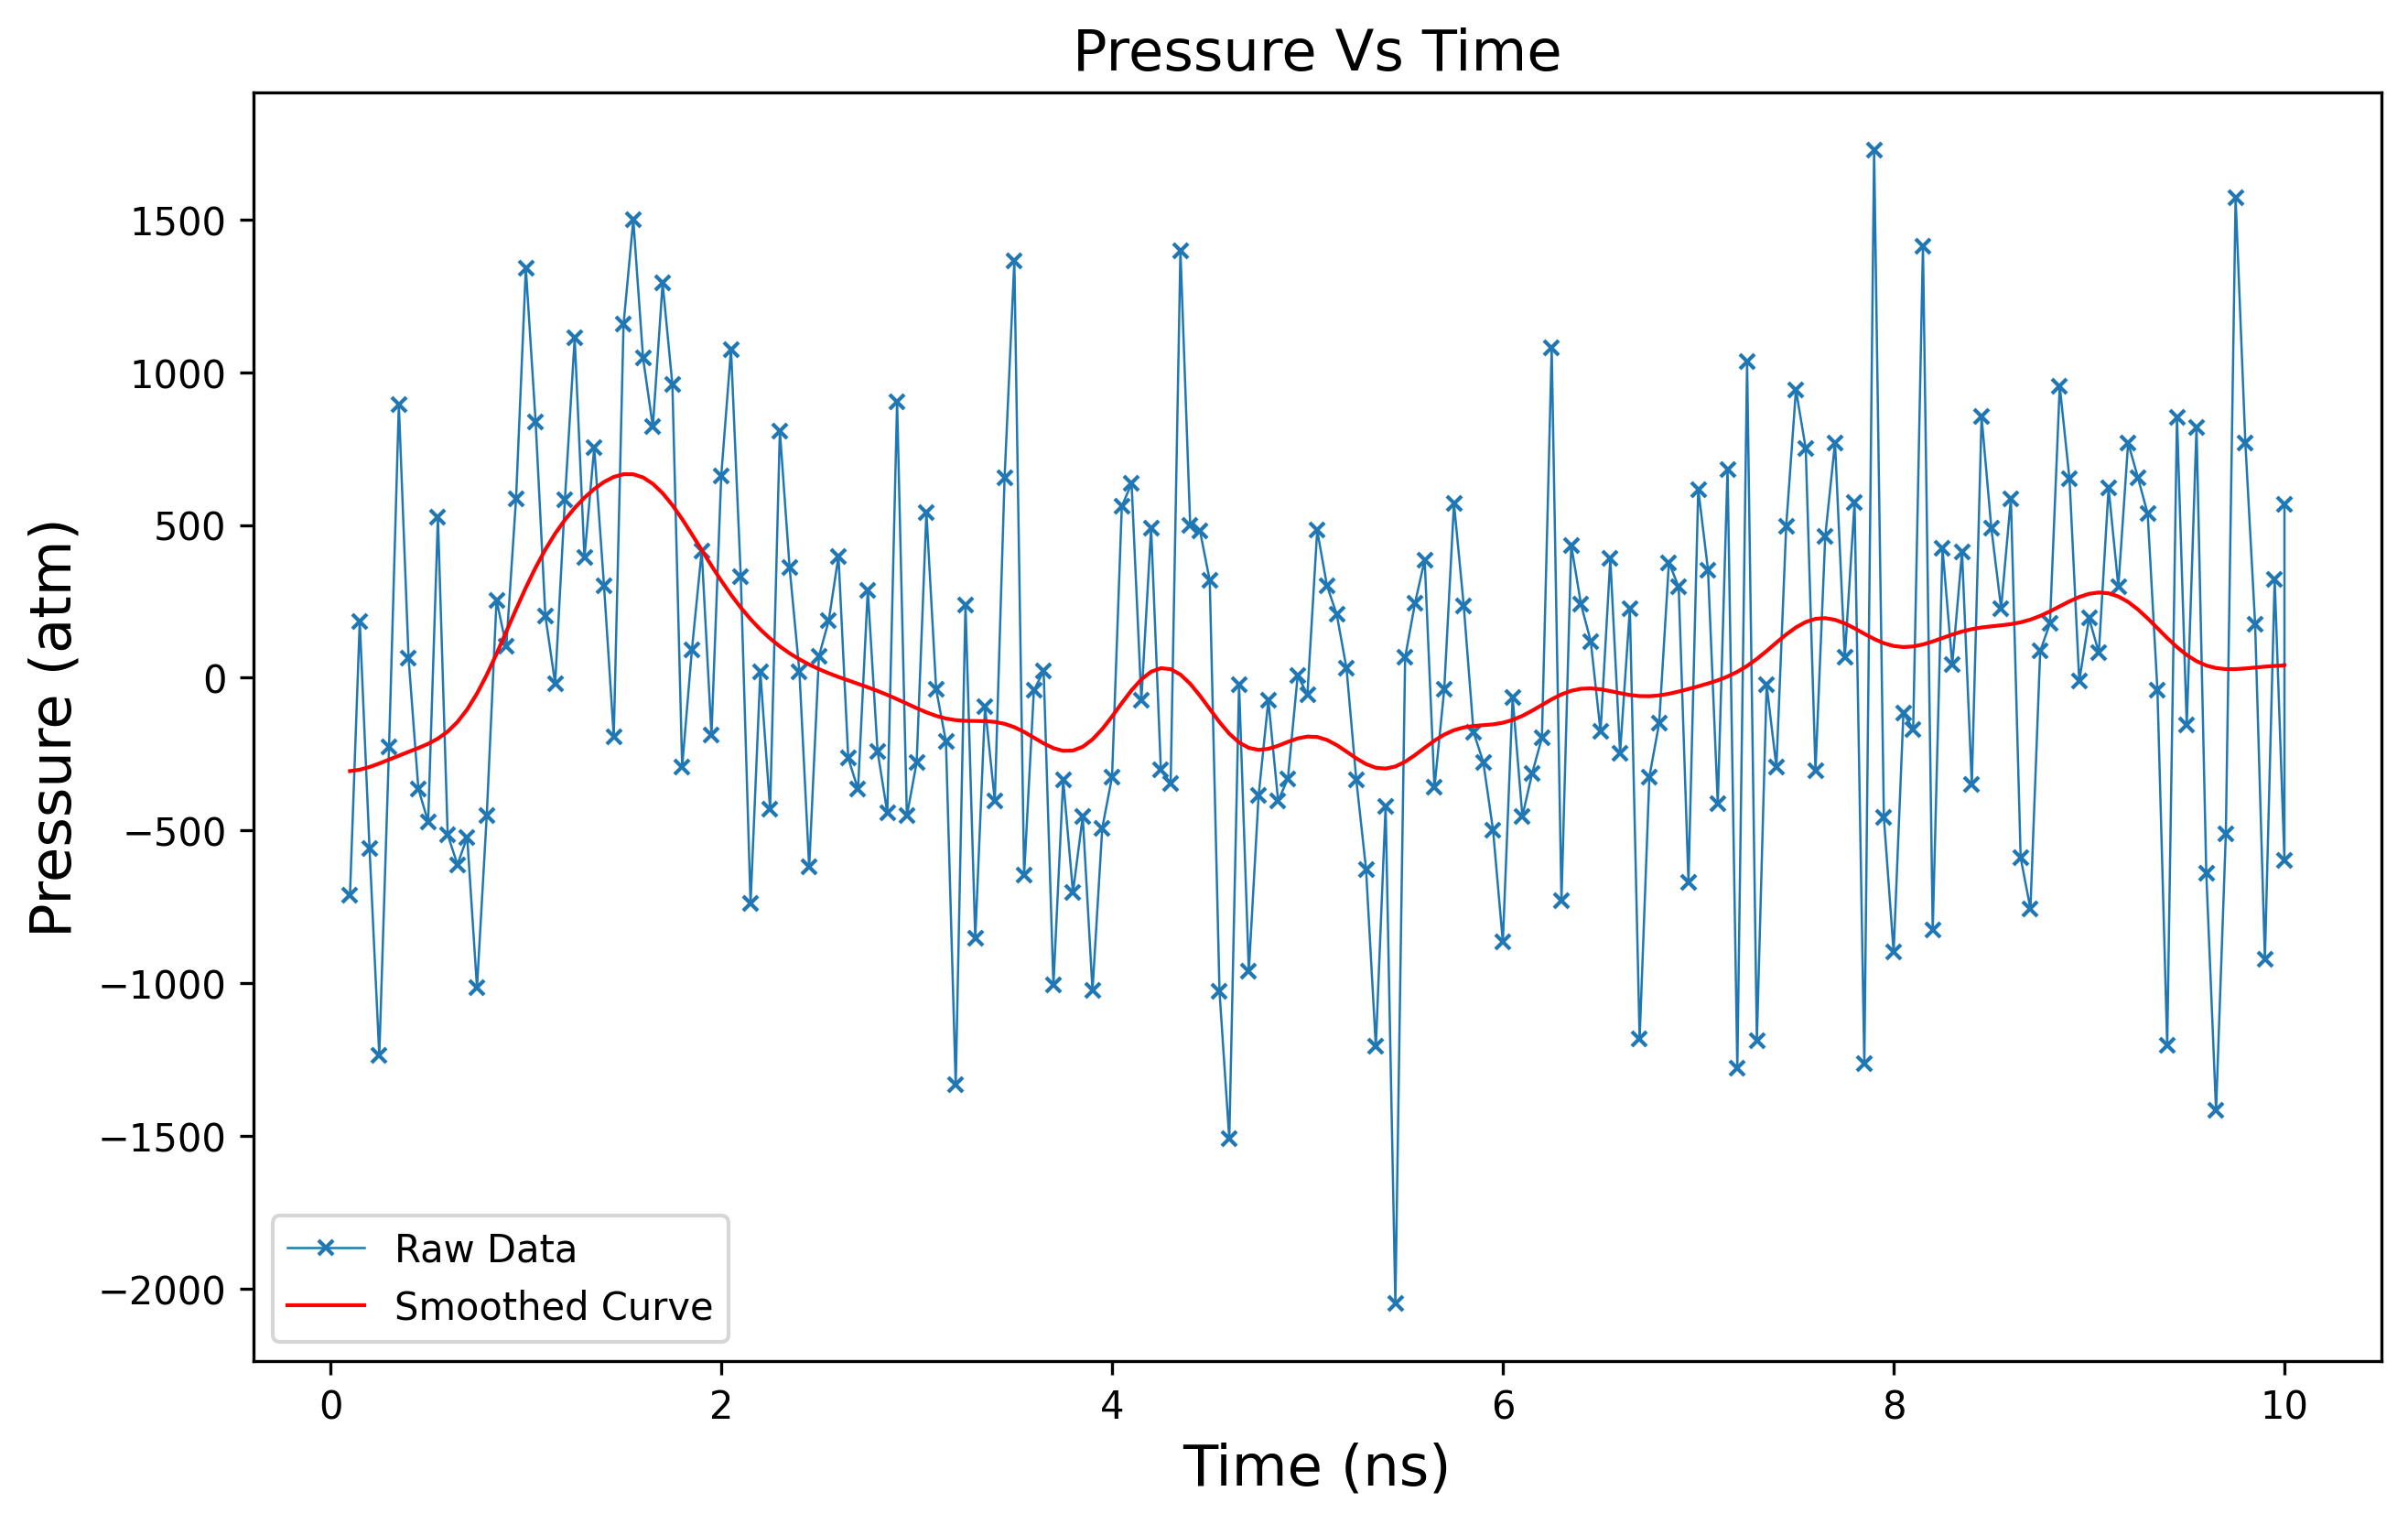

In [7]:
figure(figsize=[10,6],dpi=300)
Press_smooth = gaussian_filter1d(Press[2:], sigma=5)  # increase sigma for more smoothing
plot(time_data[2:], Press[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], Press_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Pressure Vs Time',fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel("Pressure (atm)", fontsize=15)
legend()
show()

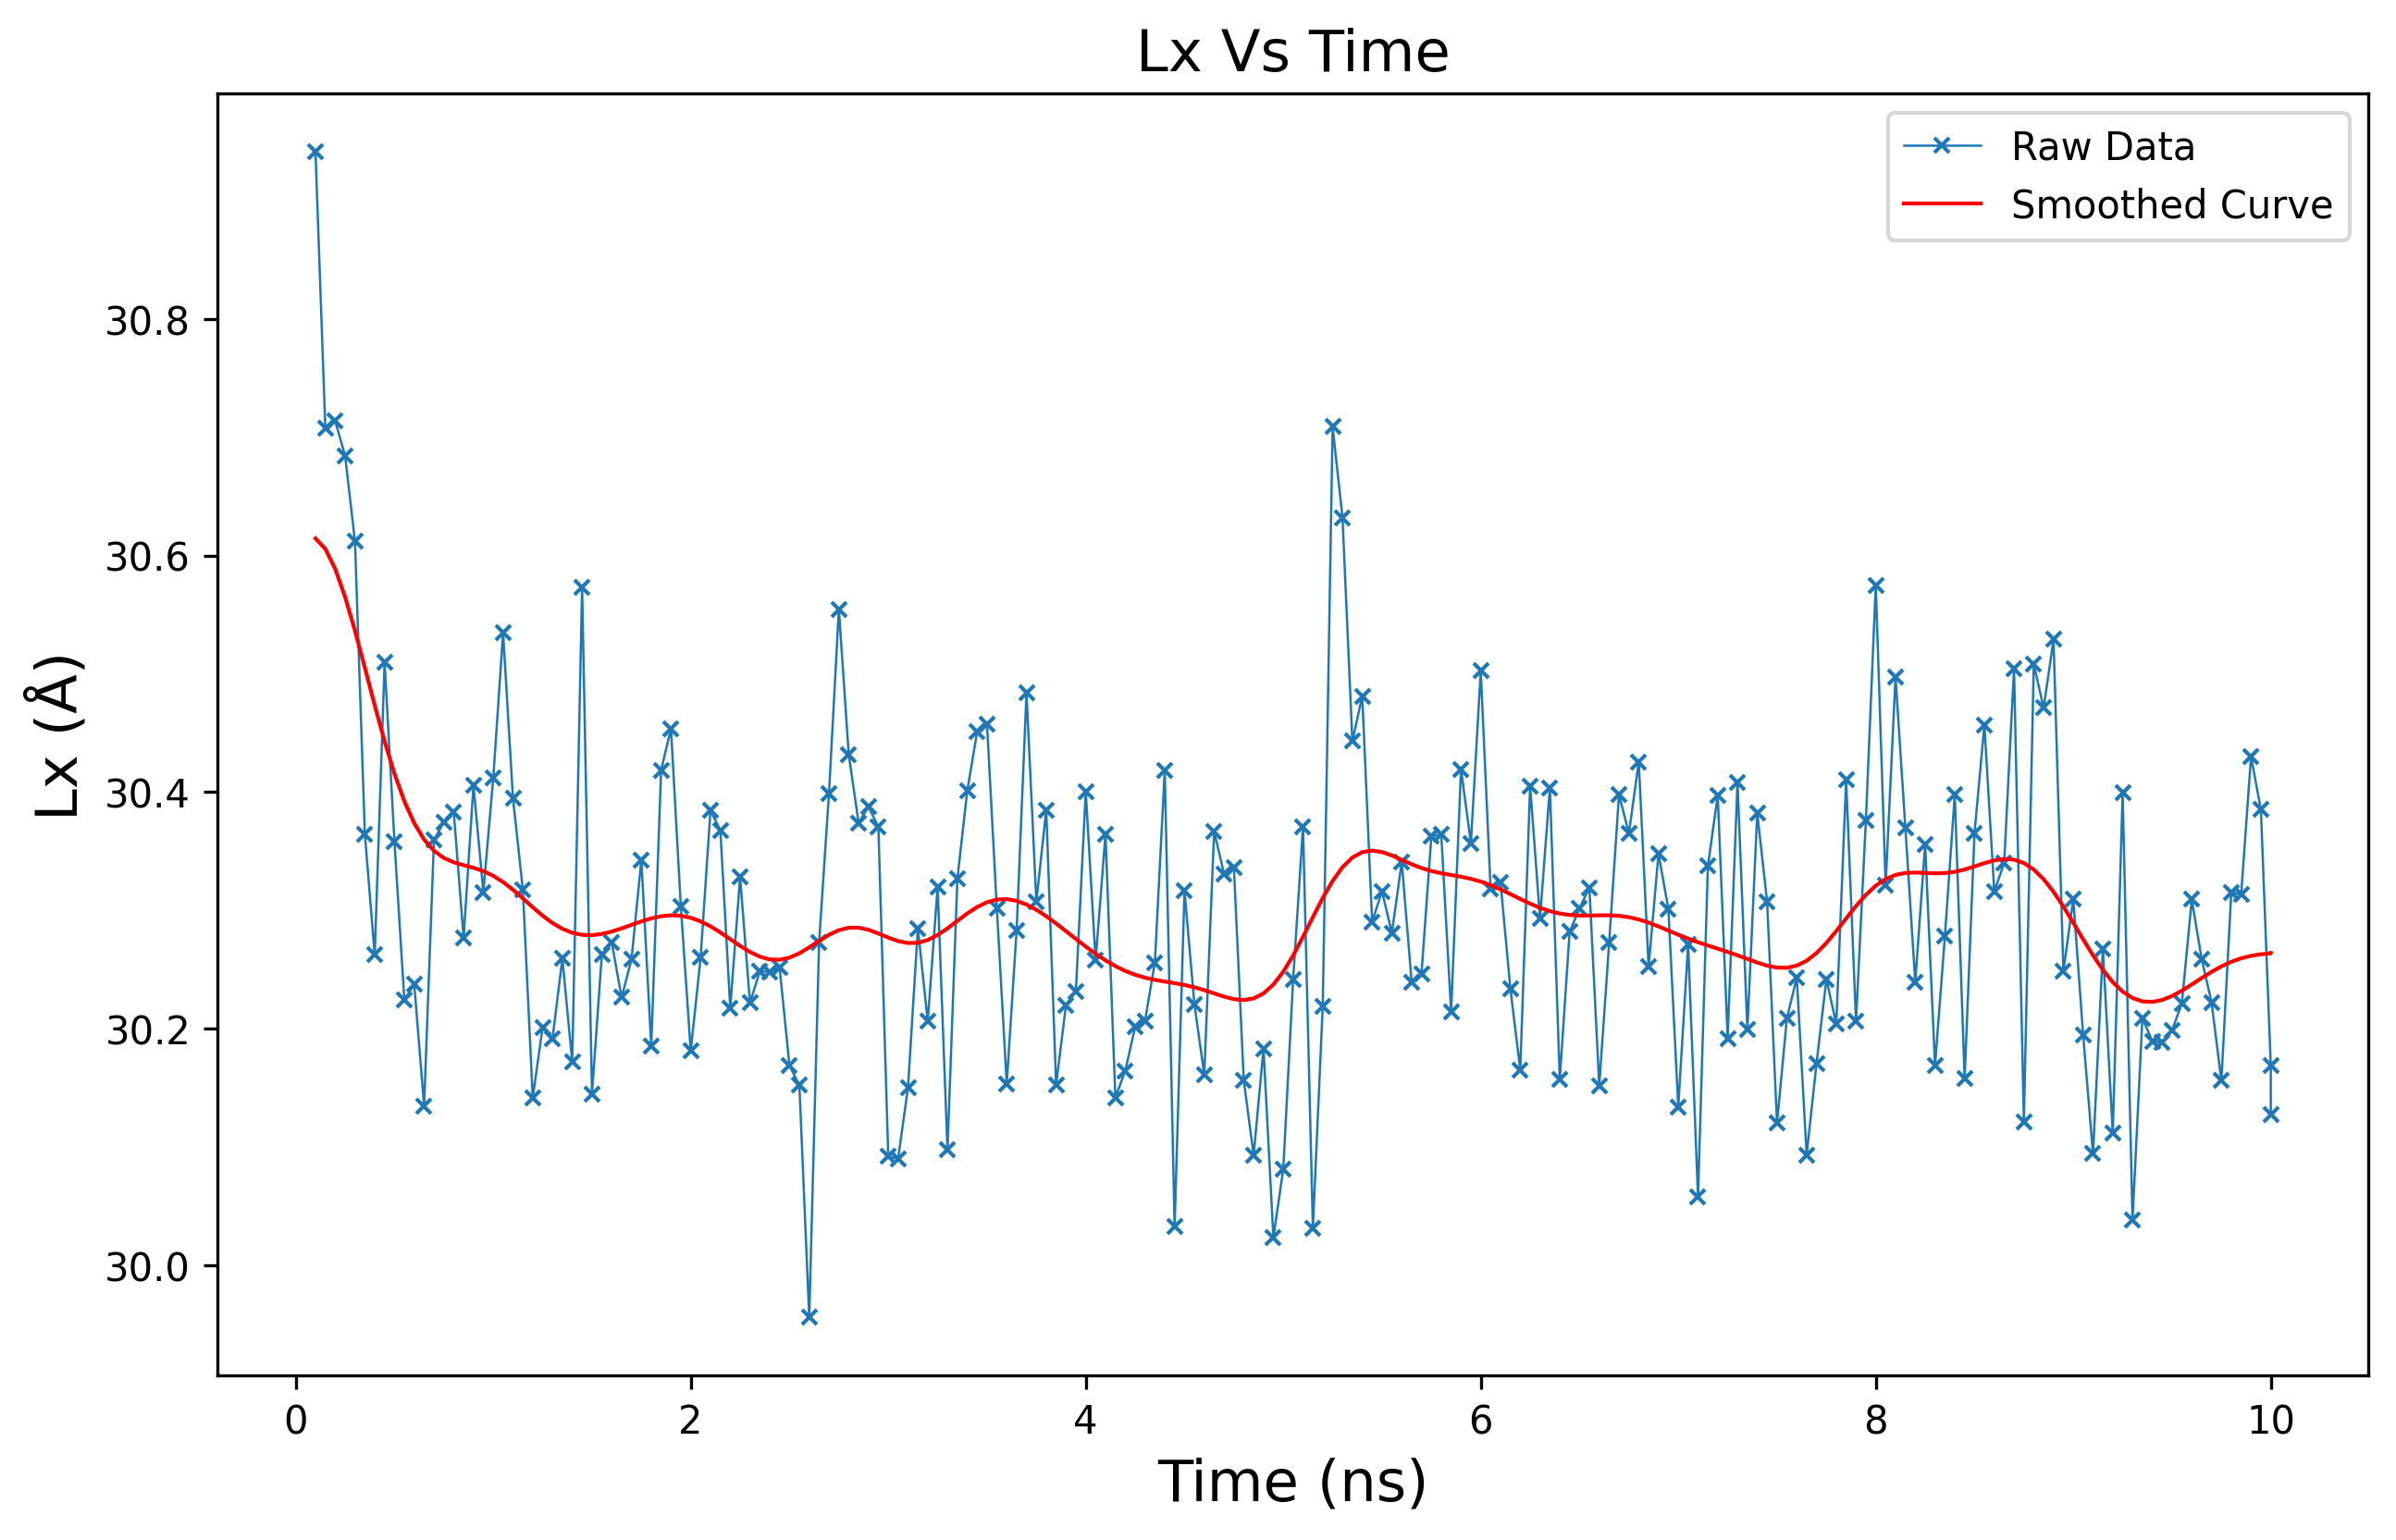

In [8]:
figure(figsize=[10,6],dpi=300)
Lx_smooth = gaussian_filter1d(Lx[2:], sigma=5)  # increase sigma for more smoothing
plot(time_data[2:], Lx[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], Lx_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Lx Vs Time',fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel("Lx (Å)",fontsize=15)
legend()
show()

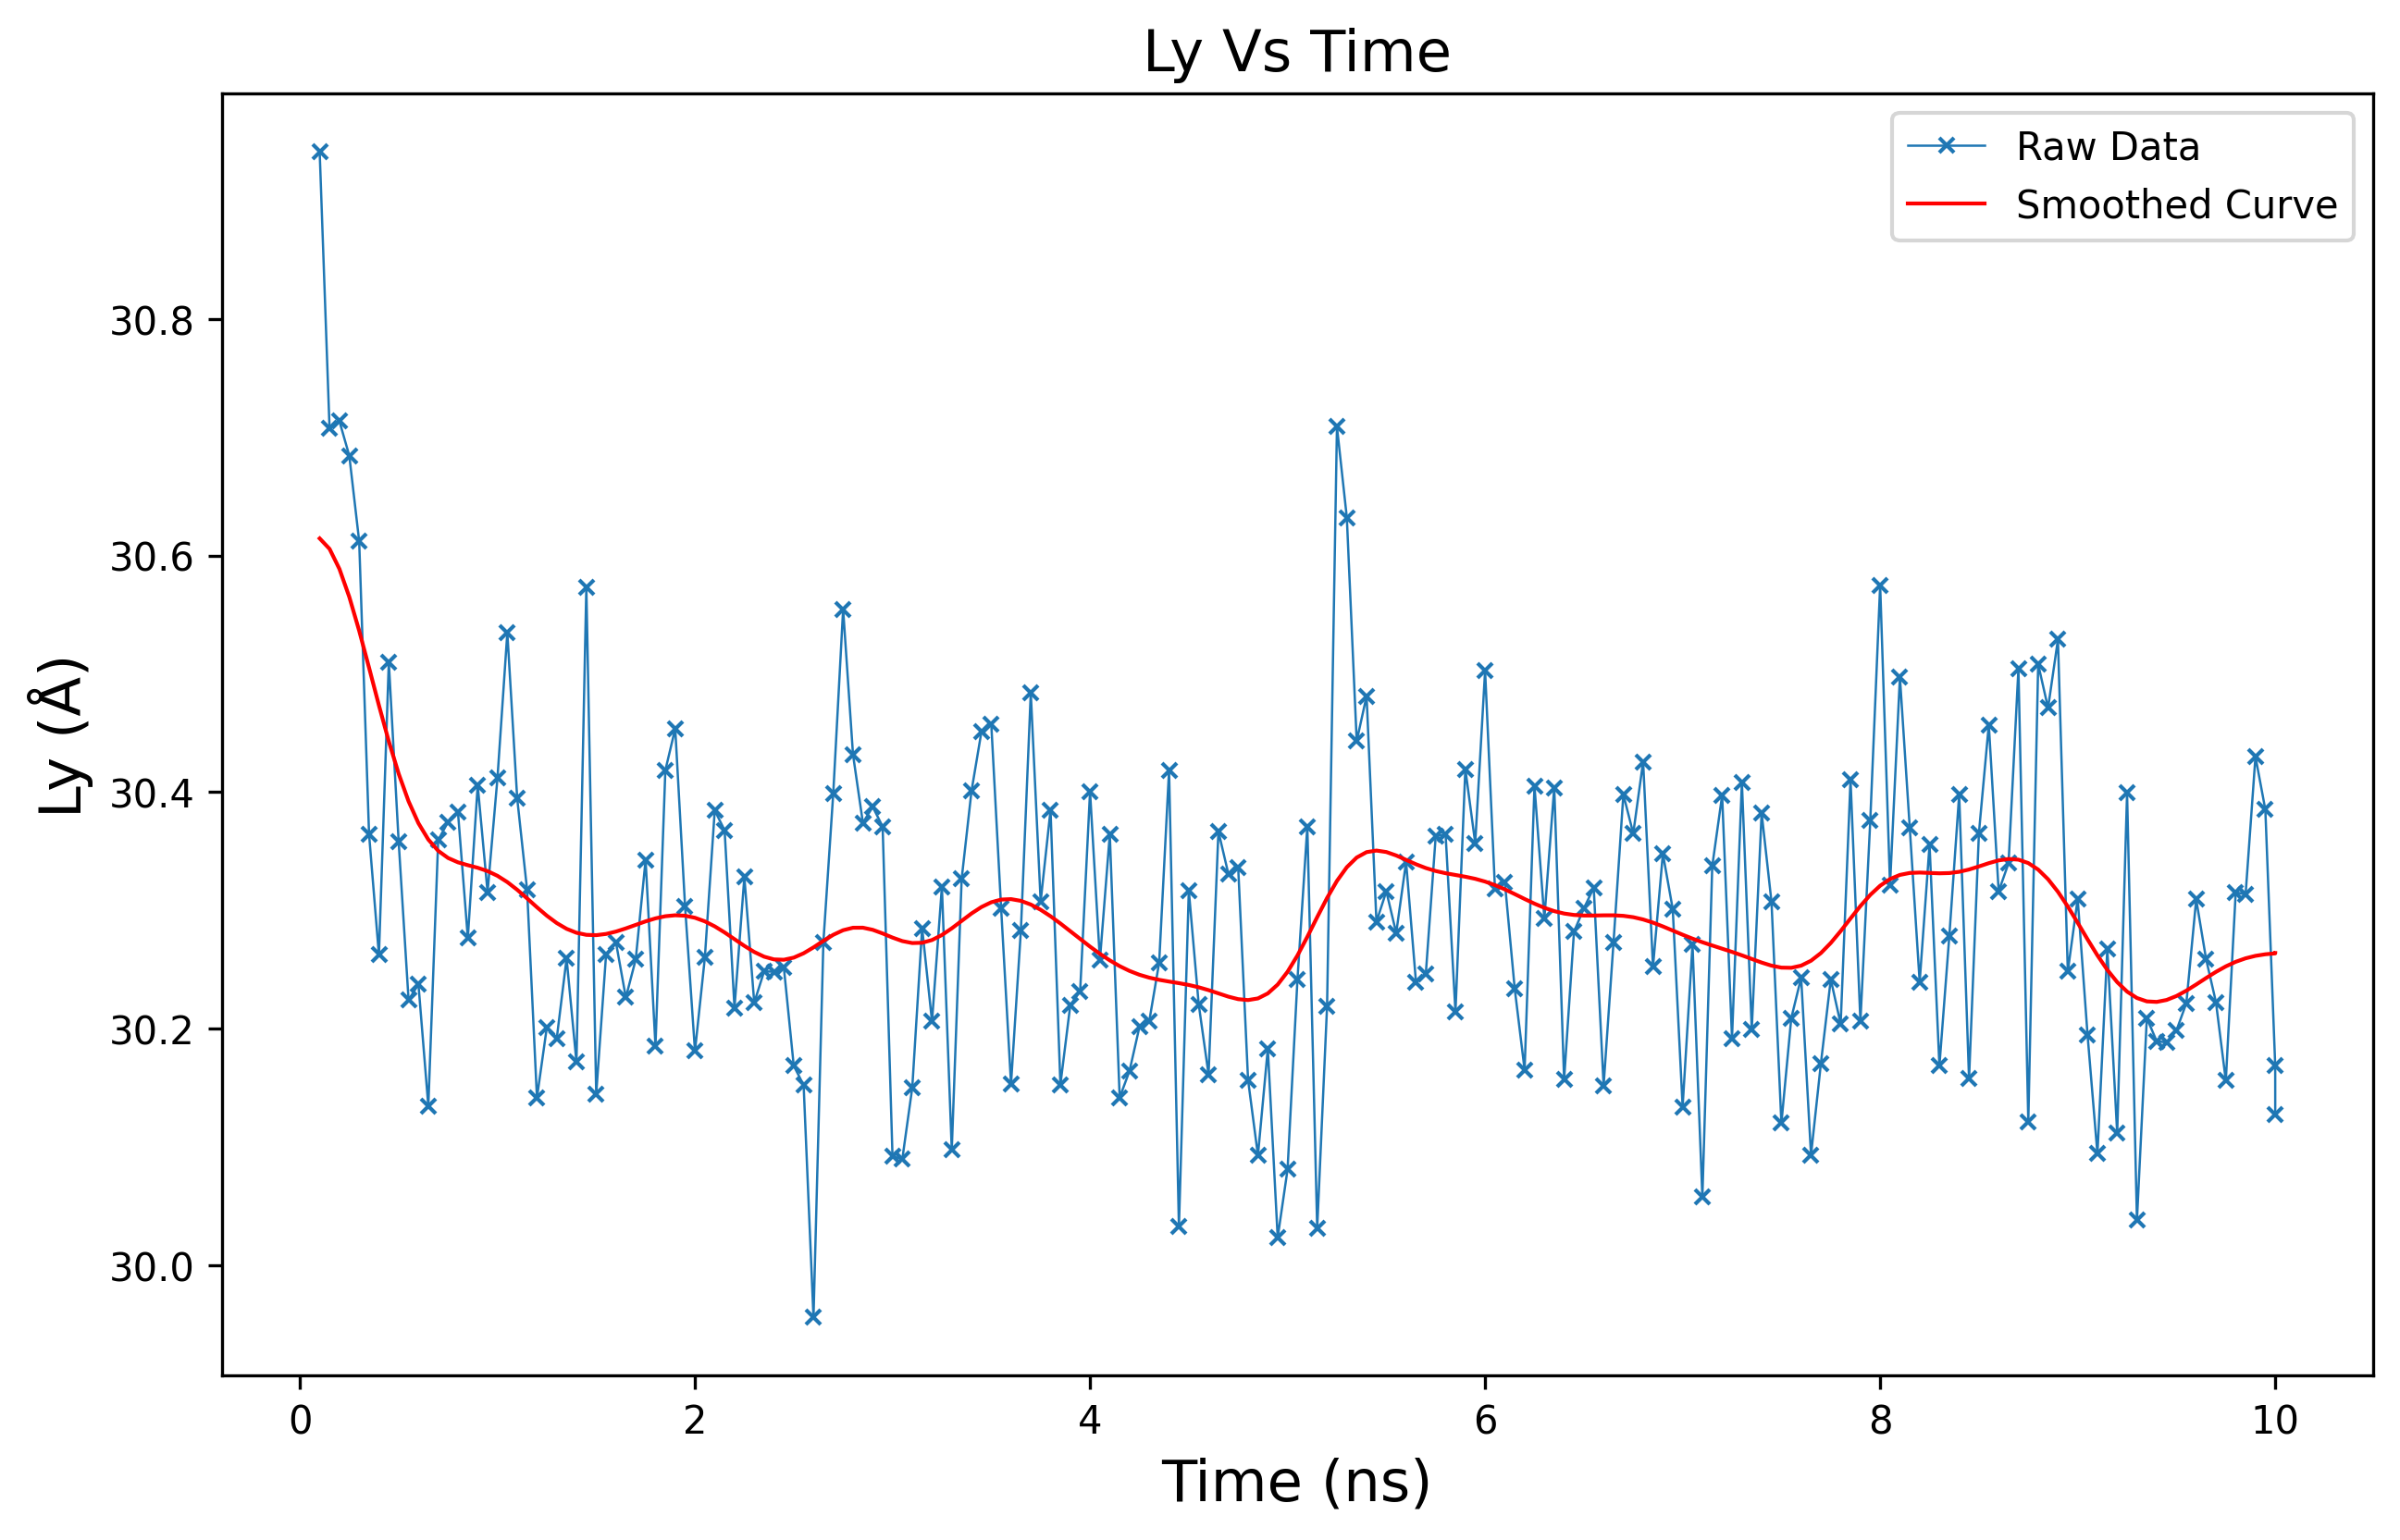

In [9]:
figure(figsize=[10,6],dpi=300)
Ly_smooth = gaussian_filter1d(Ly[2:], sigma=5)  # increase sigma for more smoothing
plot(time_data[2:], Ly[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], Ly_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Ly Vs Time',fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel("Ly (Å)",fontsize=15)
legend()
show()

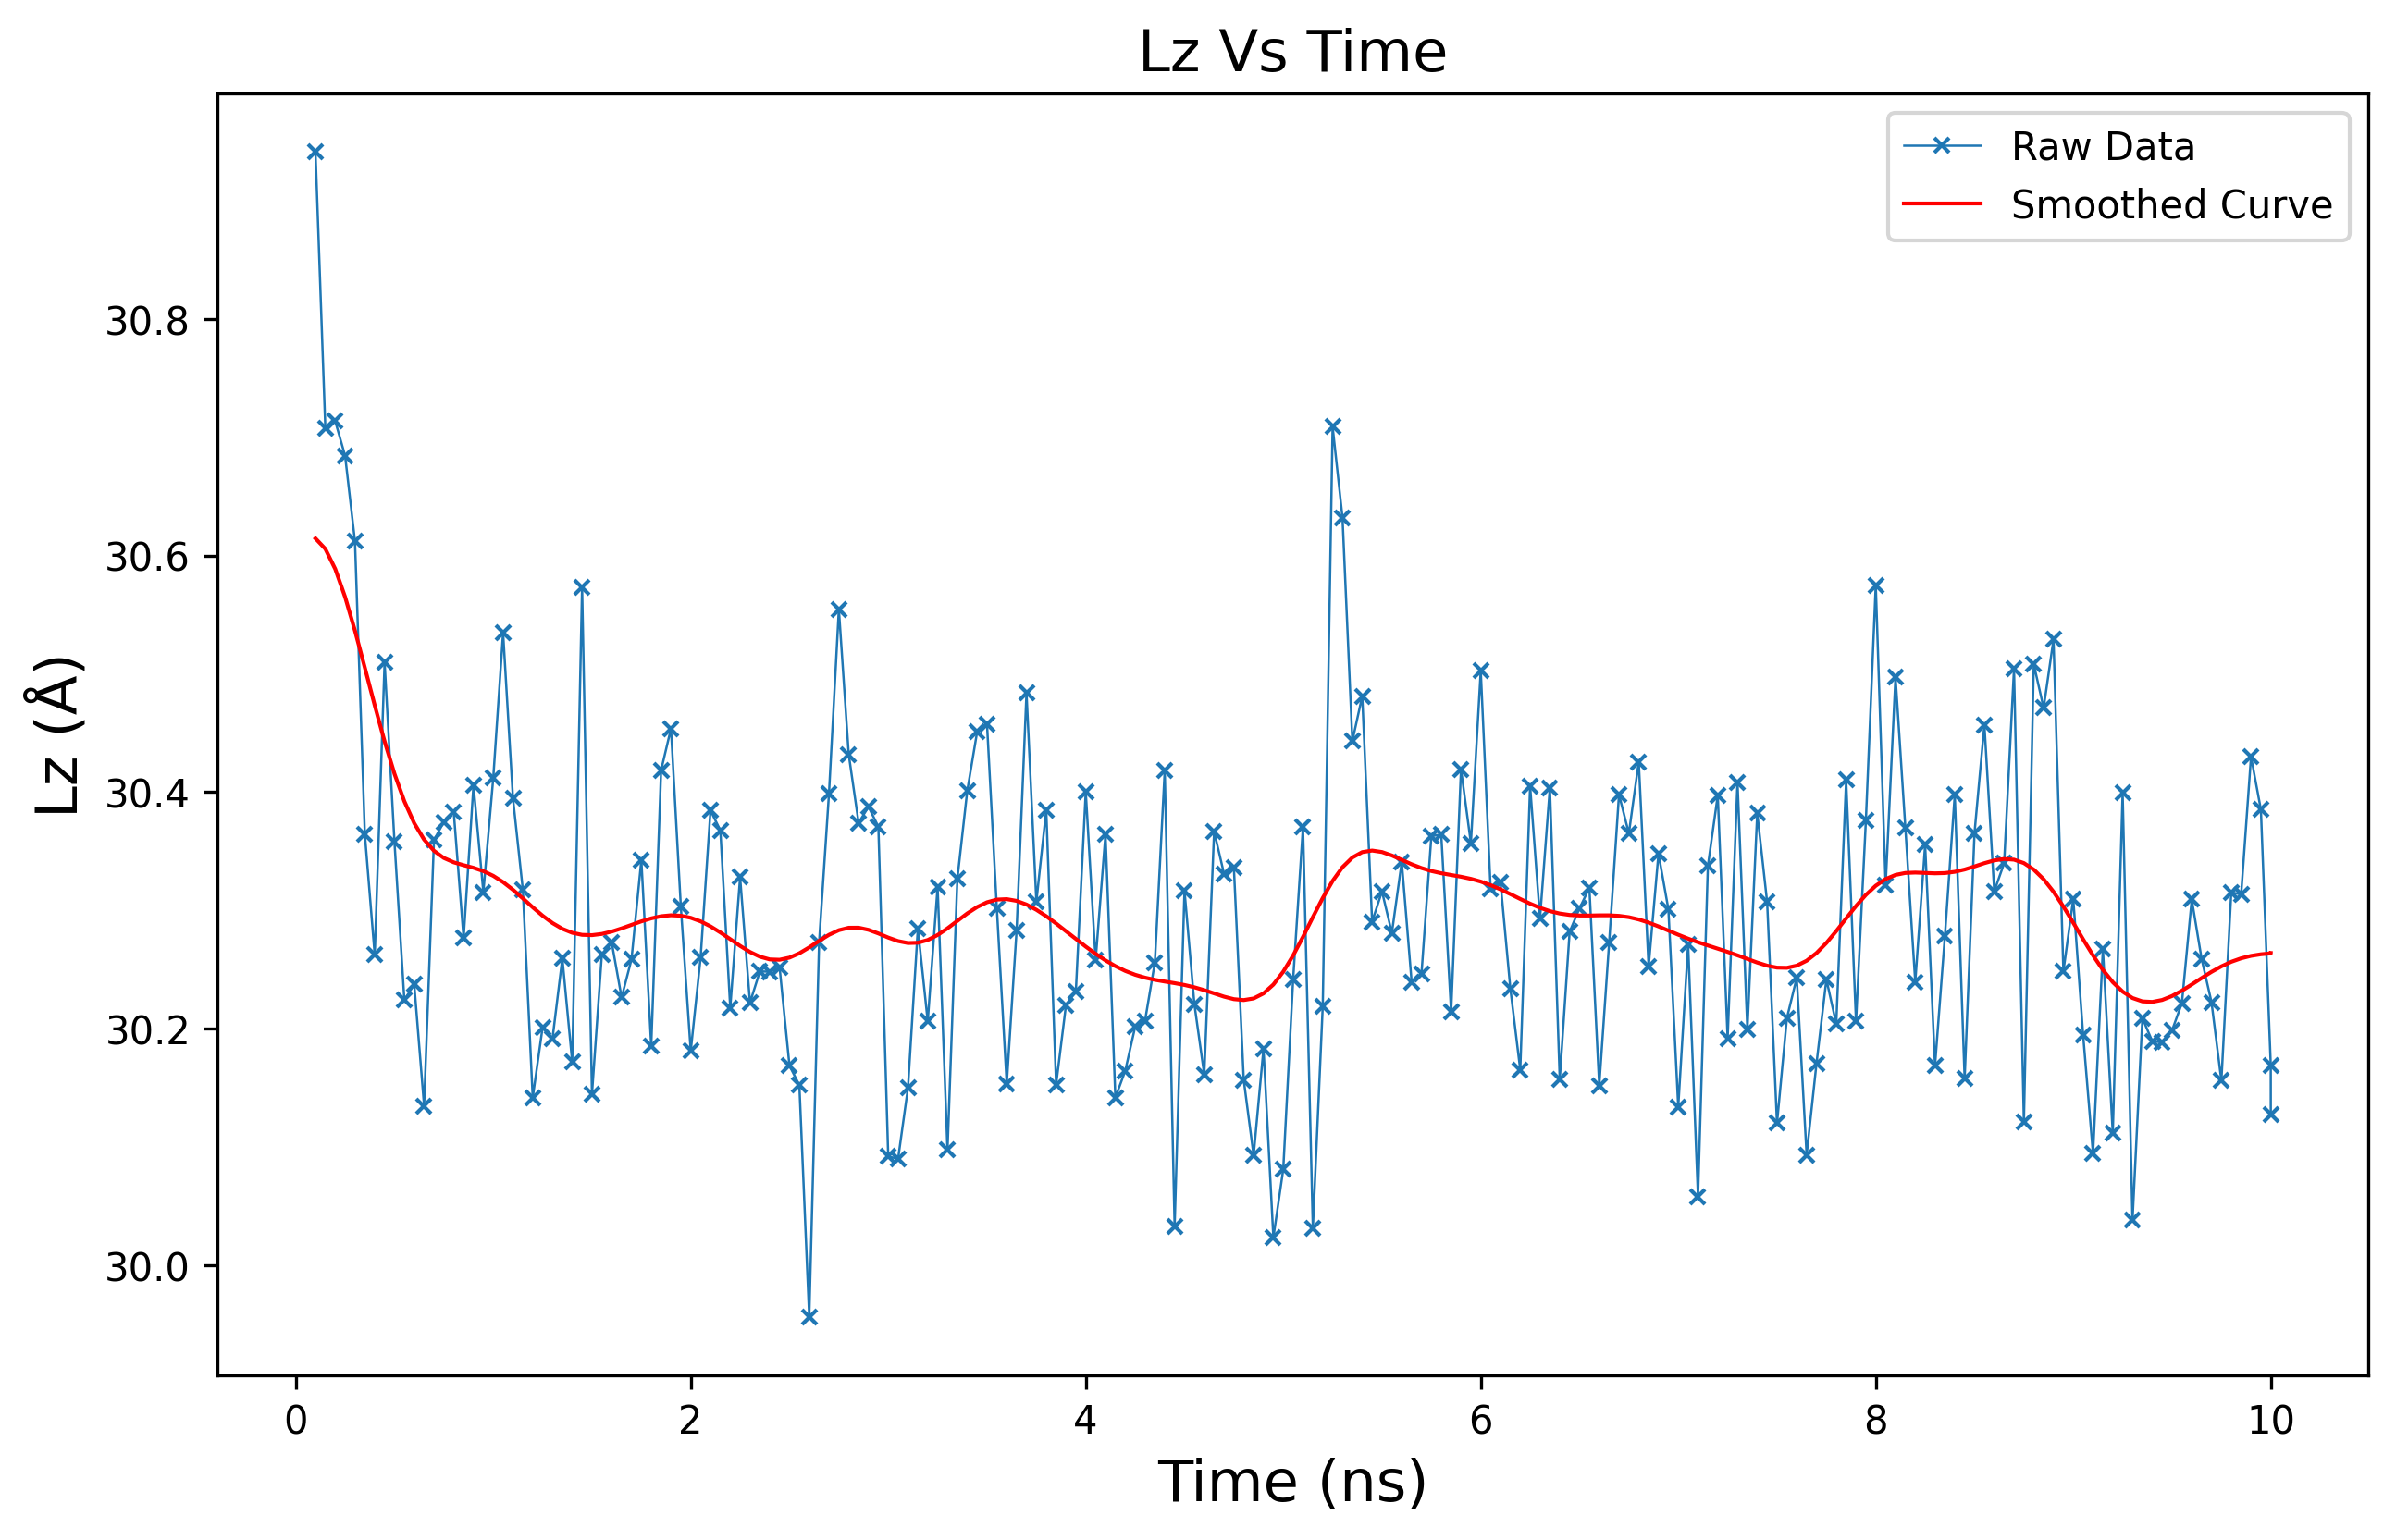

In [10]:
figure(figsize=[10,6],dpi=300)
Lz_smooth = gaussian_filter1d(Lz[2:], sigma=5)  # increase sigma for more smoothing
plot(time_data[2:], Lz[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], Lz_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Lz Vs Time',fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel("Lz (Å)",fontsize=15)
legend()
show()

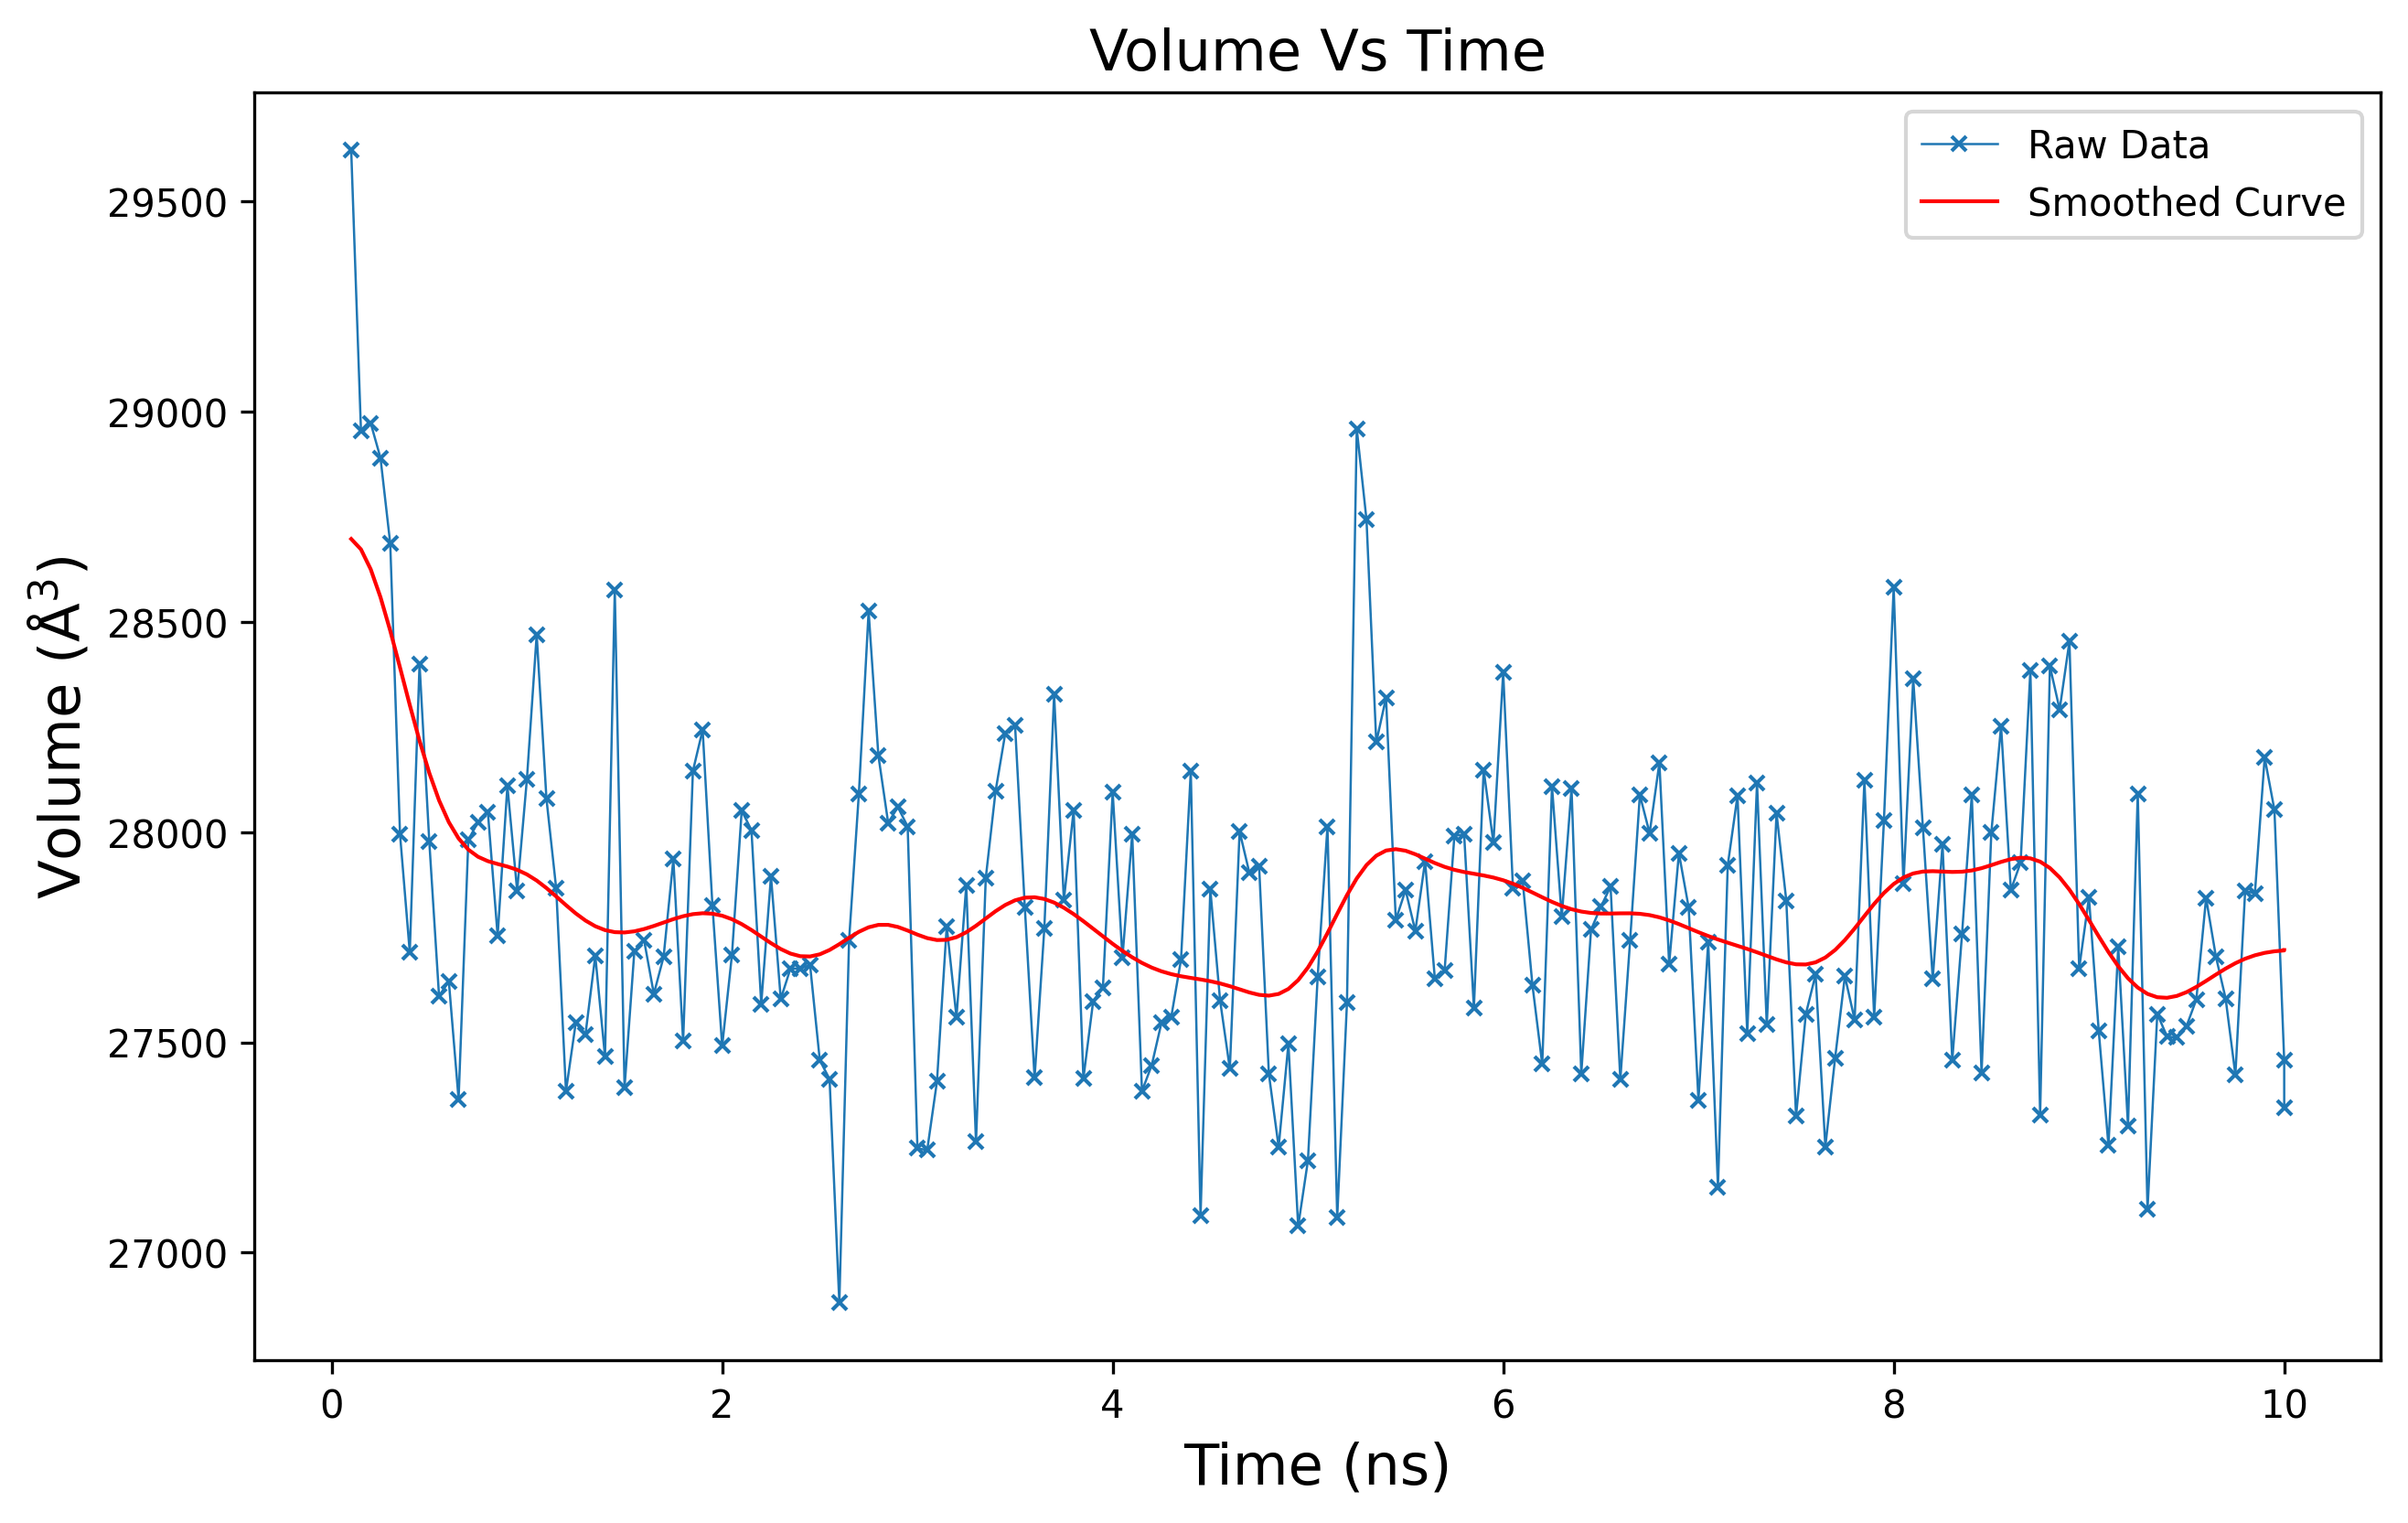

In [11]:
figure(figsize=[10,6],dpi=300)
Volume_smooth = gaussian_filter1d(Volume[2:], sigma=5)  # increase sigma for more smoothing
plot(time_data[2:], Volume[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], Volume_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Volume Vs Time',fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel(r'Volume (Å$^{3}$)',fontsize=15)
legend()
show()

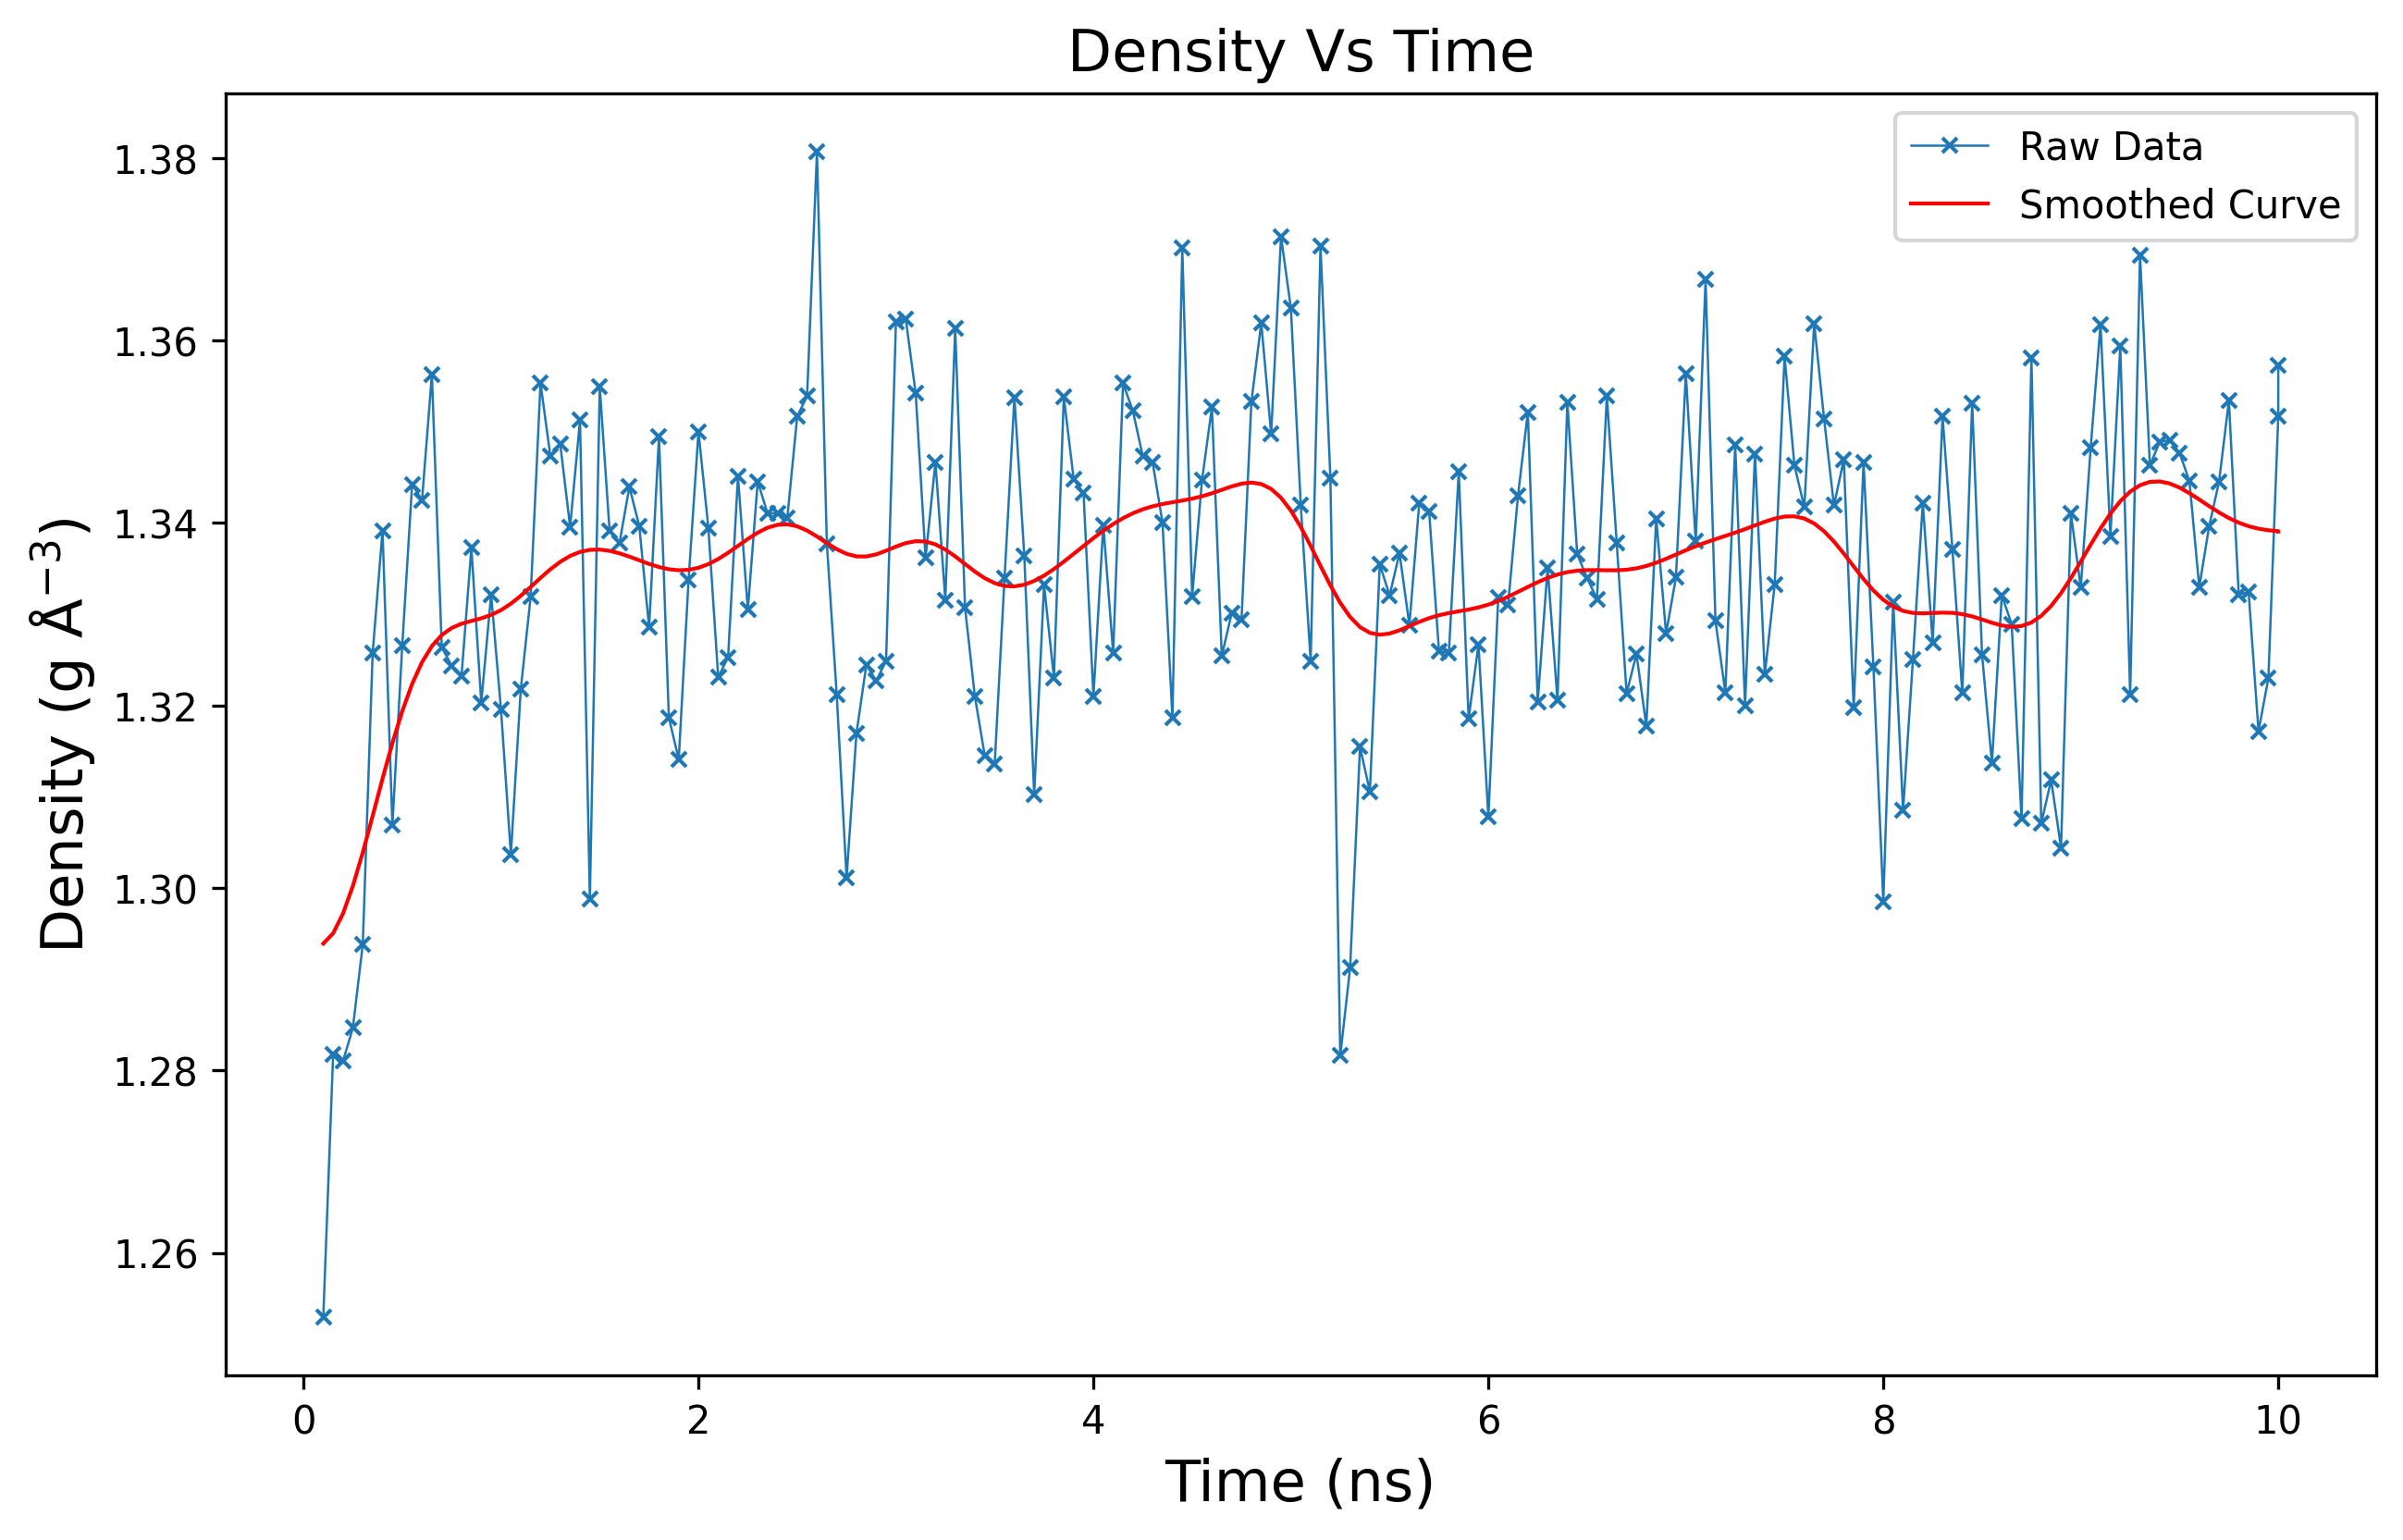

In [12]:
figure(figsize=[10,6],dpi=300)
Density_smooth = gaussian_filter1d(Density[2:], sigma=5)  # increase sigma for more smoothing
plot(time_data[2:], Density[2:], linestyle='-', marker='x',linewidth=0.6, markersize=4, label = 'Raw Data') # plot raw data
plot(time_data[2:], Density_smooth, linewidth=1, color='red', label='Smoothed Curve') # plot gausian smoothed curve
title('Density Vs Time',fontsize=15)
xlabel("Time (ns)", fontsize=15)
ylabel(r'Density (g Å$^{-3}$)',fontsize=15)
legend()
show()